# COVID-19: A predictive analysis
by: Kaike W. Reis


## Steps
- Missing Data Analysis & Pre-processing
- Exploratory Data Analysis
- Predictive Analysis - General Information
- Task 1
- Task 2
- Conclusions

## Notebook Libraries

In [2]:
# Standard modules
import numpy as np
import pandas as pd

# Machine Learning modules - quantitative analysis
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split 
from sklearn.metrics import classification_report, confusion_matrix

# Graphical modules
import matplotlib.pyplot as plt
import seaborn as sns

# Display module
from IPython.display import display

# Missing Data Analysis & Pre-processing

## Importing data

In [3]:
# Importing raw dataset
dataset_raw = pd.read_excel('/kaggle/input/covid19/dataset.xlsx')

In [4]:
# Drop unused columns
dataset_raw.drop('Patient ID', axis=1, inplace=True)

In [5]:
# Change column names: lowercase and '_' over space
new_columns = list()
# Loop over all columns
for col in dataset_raw.columns:
    new_columns.append(col.lower().replace(' ','_'))
# Modify dataset columns
dataset_raw.columns = new_columns

## Missing Data Analysis

### **How many NaN values have each column?**

In [6]:
# How many nan have each column
nan_per_column = pd.DataFrame(dataset_raw.isna().sum(),columns=['nanValues']).reset_index()

# Calculate NaN %
for i in range(0,len(nan_per_column)):
    nan_per_column.loc[i, 'nanValuesPct'] = 100*round(nan_per_column.loc[i, 'nanValues']/len(dataset_raw),3)

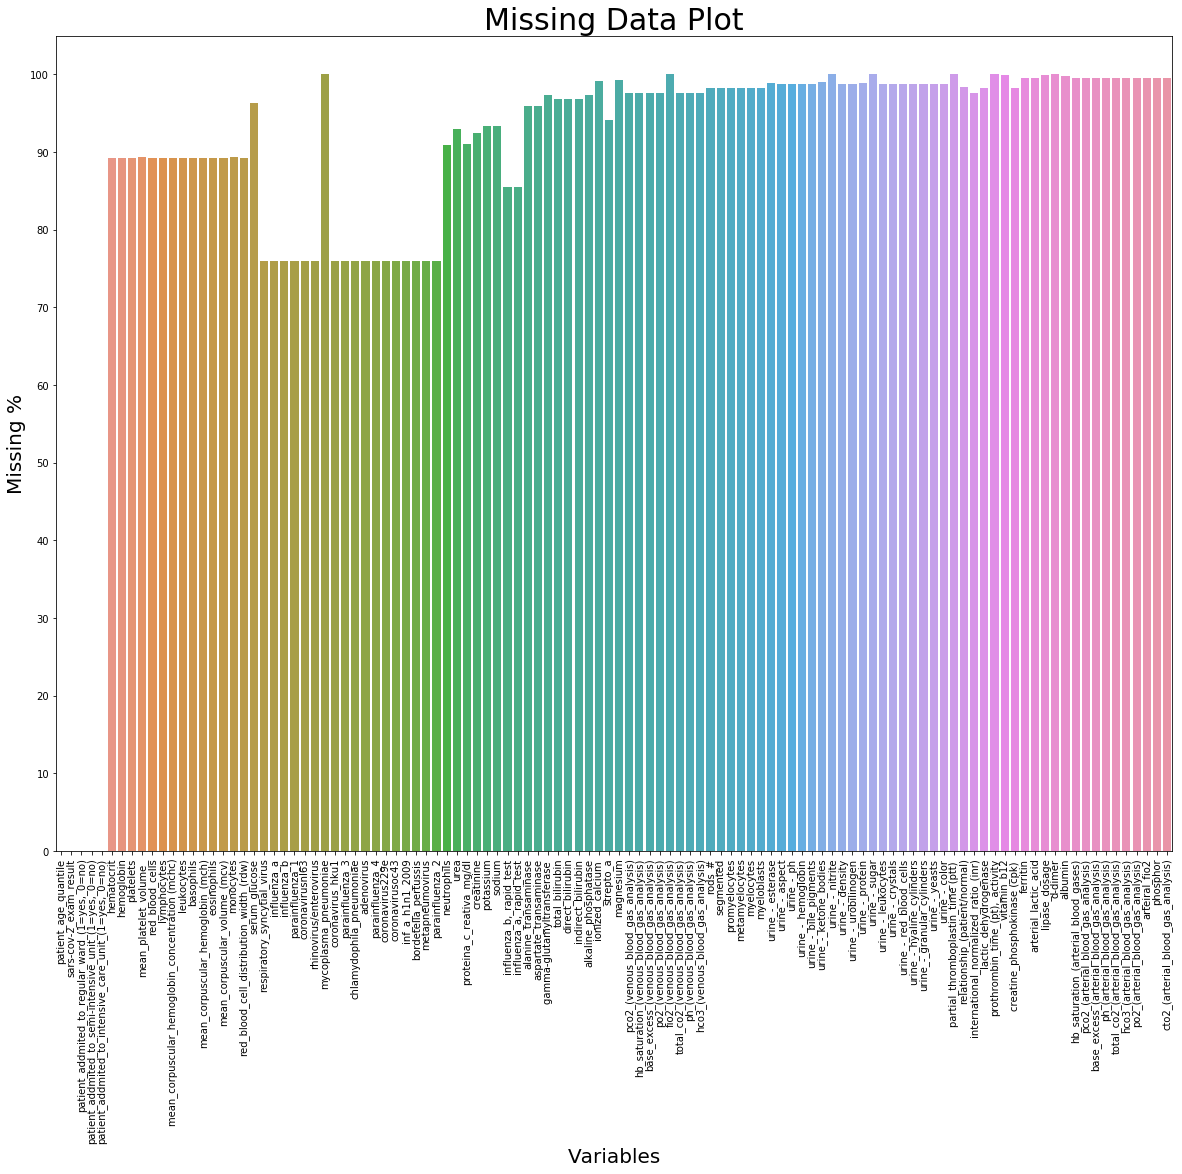

In [7]:
# Plot - % of missing rows for each column
plt.figure(figsize=(20,15))
sns.barplot(x="index", y="nanValuesPct", data=nan_per_column)
plt.xlabel('Variables', fontsize=20)
plt.ylabel('Missing %', fontsize=20)
plt.title('Missing Data Plot', fontsize=30)
plt.yticks([0,10,20,30,40,50,60,70,80,90,100])
plt.xticks(rotation=90);

Based on this plot, It's clear that this dataset have a lot of missing values, so before models development it's necessary to have a complete dataset to train. 

First I have to decide what happens with our NaN values:
- Get only complete samples?
- Impute all missing values?

Well, both solutions are not an option. The first one probably will select a complete dataset with 0 samples.

In [8]:
len(dataset_raw.dropna(how='any'))

0

The second one: "Impute all missing values" can be complicated. In Missing Data Analysis (field that studies forms to impute data) there are some golden rules (more like recommendations):
- You need to understand if your data is Missing Completely at Random (MCAR), Missing at Random (MAR) or missing Not At Random (MNAR)
- Samples with more than 50% missing data should not be imputed
- Columns with more than 5%-10% should not be imputed

Let's see an example:


In [9]:
# Boolean dataset for missing values, except sars-cov-2
dataset_nan = dataset_raw.drop('sars-cov-2_exam_result',axis=1).isnull().join(dataset_raw['sars-cov-2_exam_result'])

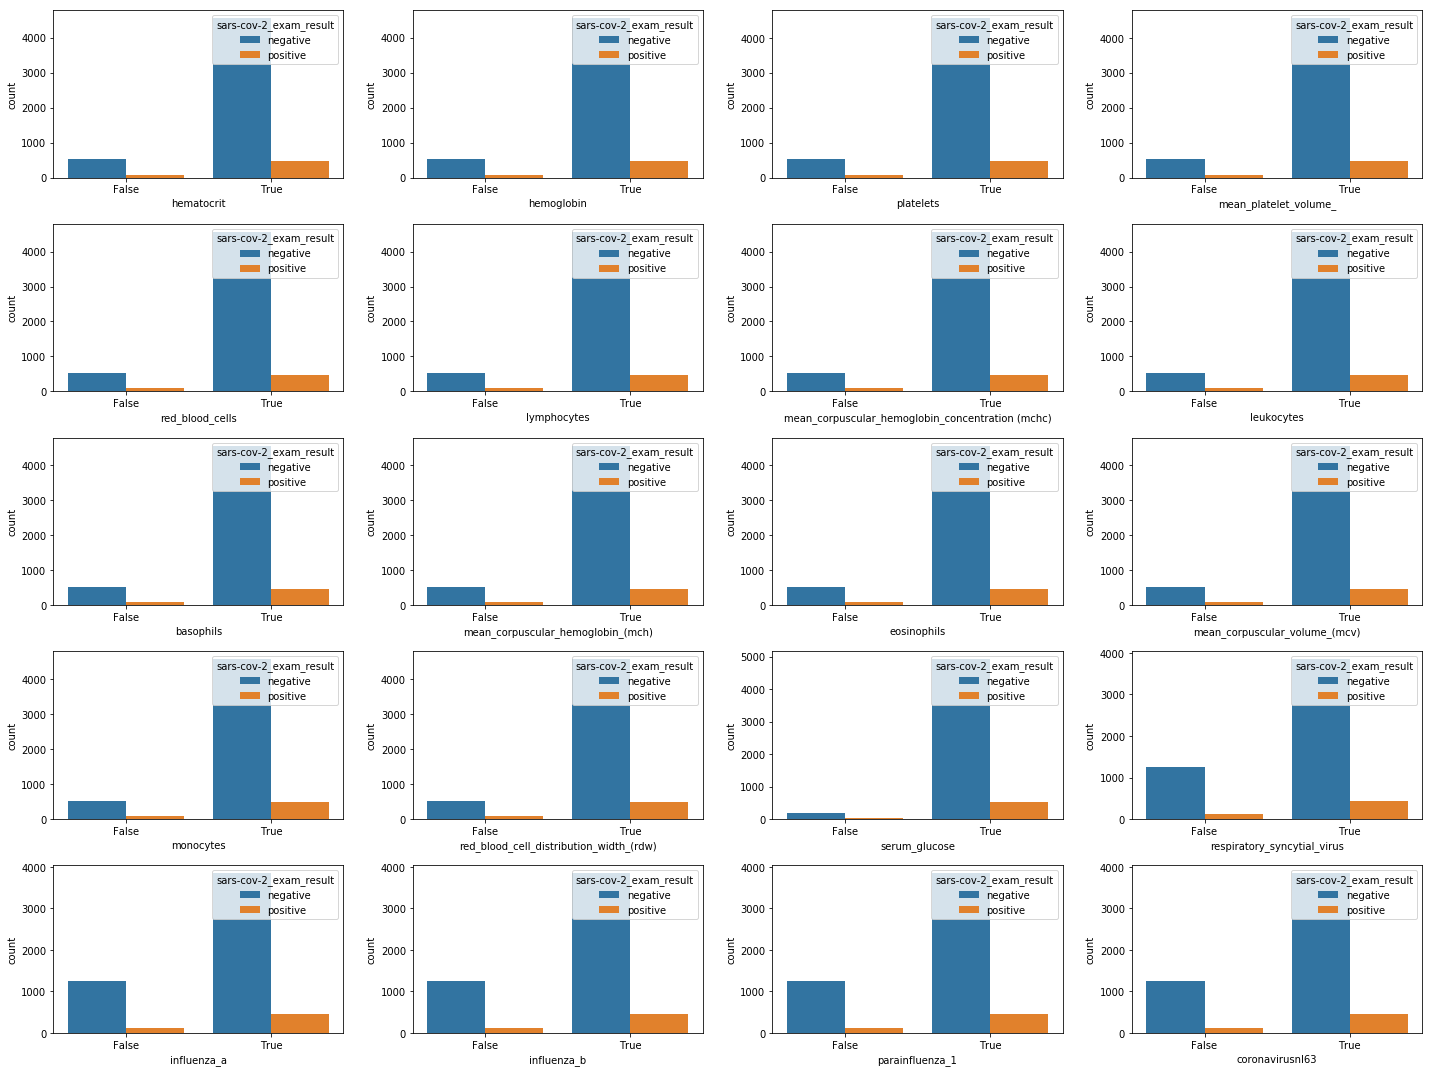

In [10]:
# PLOT - Plot NaN Bool Dataset related to sars
fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(20,15))
features_to_plot = dataset_nan.columns[4:24] # Avoid first 4 variables because they are complete and are target variables
r = 0 # Index row
c = 0 # Index col
for f in features_to_plot:
    # Count Plot
    sns.countplot(x=f, hue='sars-cov-2_exam_result', data=dataset_nan,ax=axes[r][c])
    # Plot configs
    axes[r][c].legend(title='sars-cov-2_exam_result', loc='upper right')
    # Index control
    c += 1
    if c > 3:
        c = 0
        r += 1

plt.tight_layout()

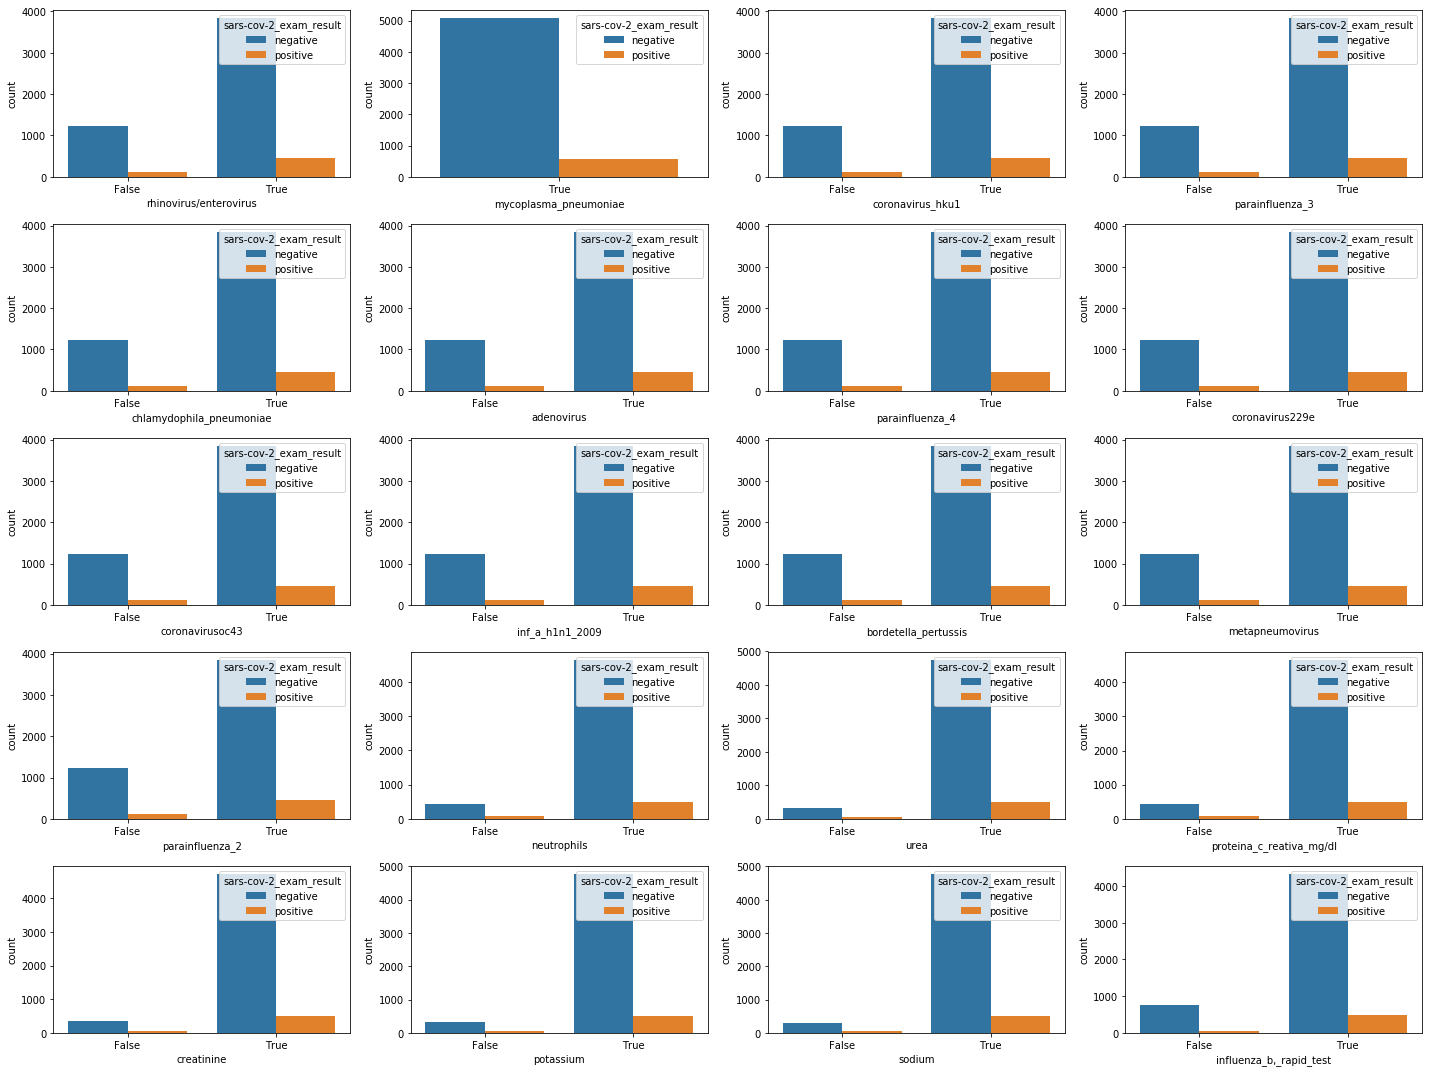

In [11]:
# PLOT - Plot NaN Bool Dataset related to sars
fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(20,15))
features_to_plot = dataset_nan.columns[24:44] # Avoid first 4 variables because they are complete and are target variables
r = 0 # Index row
c = 0 # Index col
for f in features_to_plot:
    # Count Plot
    sns.countplot(x=f, hue='sars-cov-2_exam_result', data=dataset_nan,ax=axes[r][c])
    # Plot configs
    axes[r][c].legend(title='sars-cov-2_exam_result', loc='upper right')
    # Index control
    c += 1
    if c > 3:
        c = 0
        r += 1

plt.tight_layout()

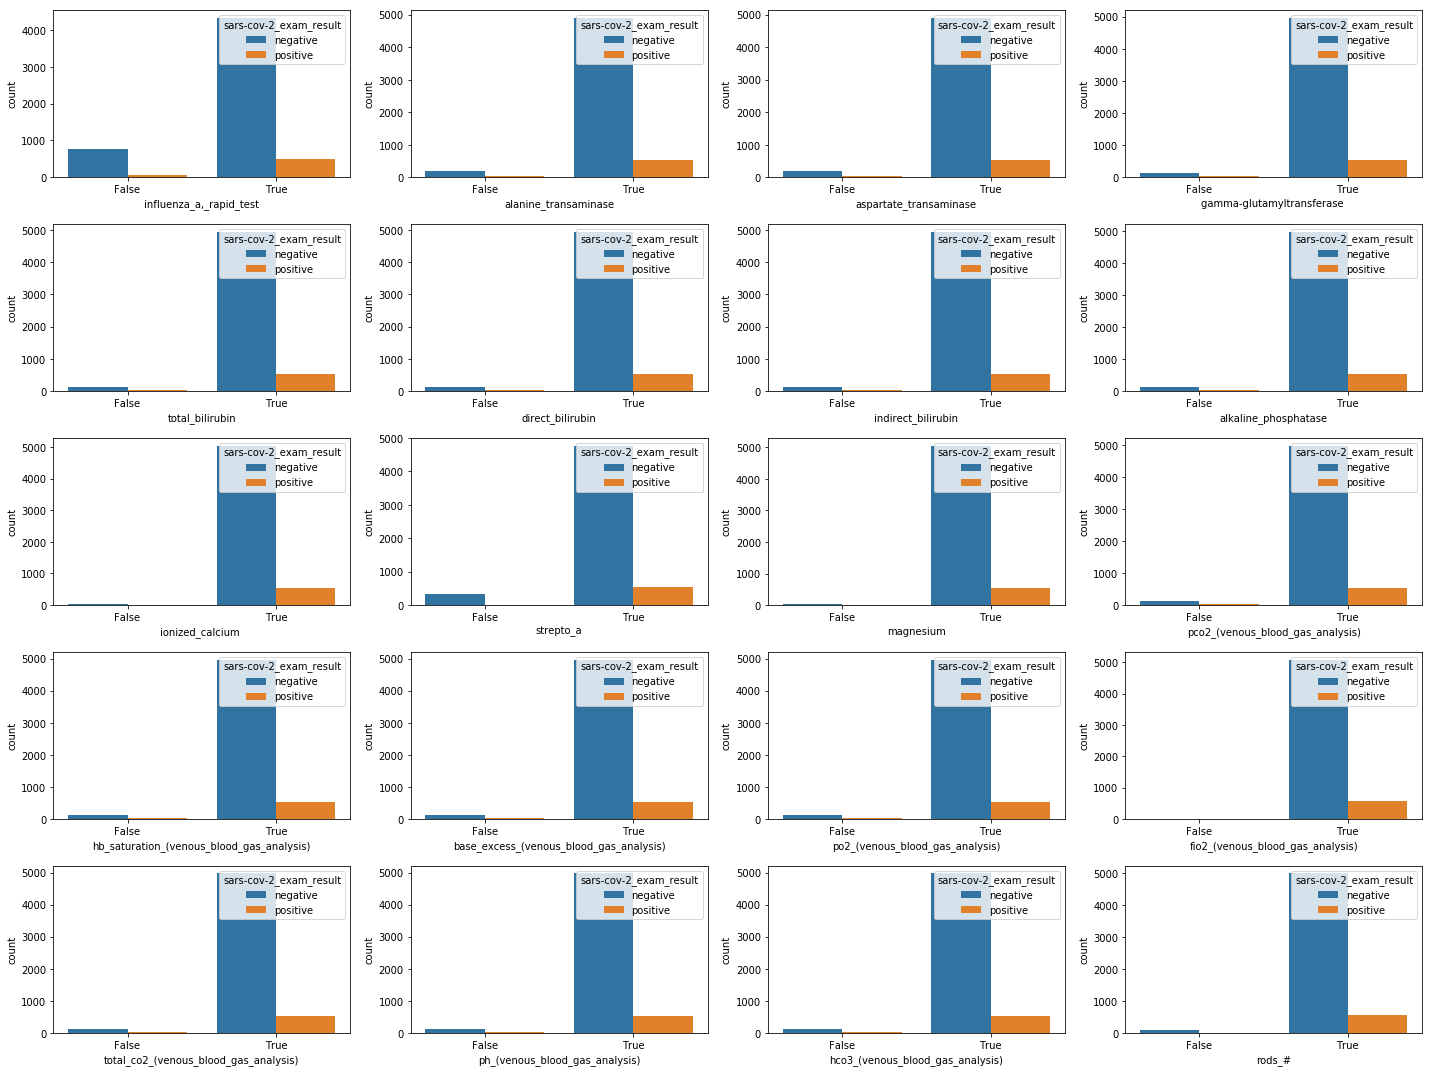

In [12]:
# PLOT - Plot NaN Bool Dataset related to sars
fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(20,15))
features_to_plot = dataset_nan.columns[44:64] # Avoid first 4 variables because they are complete and are target variables
r = 0 # Index row
c = 0 # Index col
for f in features_to_plot:
    # Count Plot
    sns.countplot(x=f, hue='sars-cov-2_exam_result', data=dataset_nan,ax=axes[r][c])
    # Plot configs
    axes[r][c].legend(title='sars-cov-2_exam_result', loc='upper right')
    # Index control
    c += 1
    if c > 3:
        c = 0
        r += 1

plt.tight_layout()

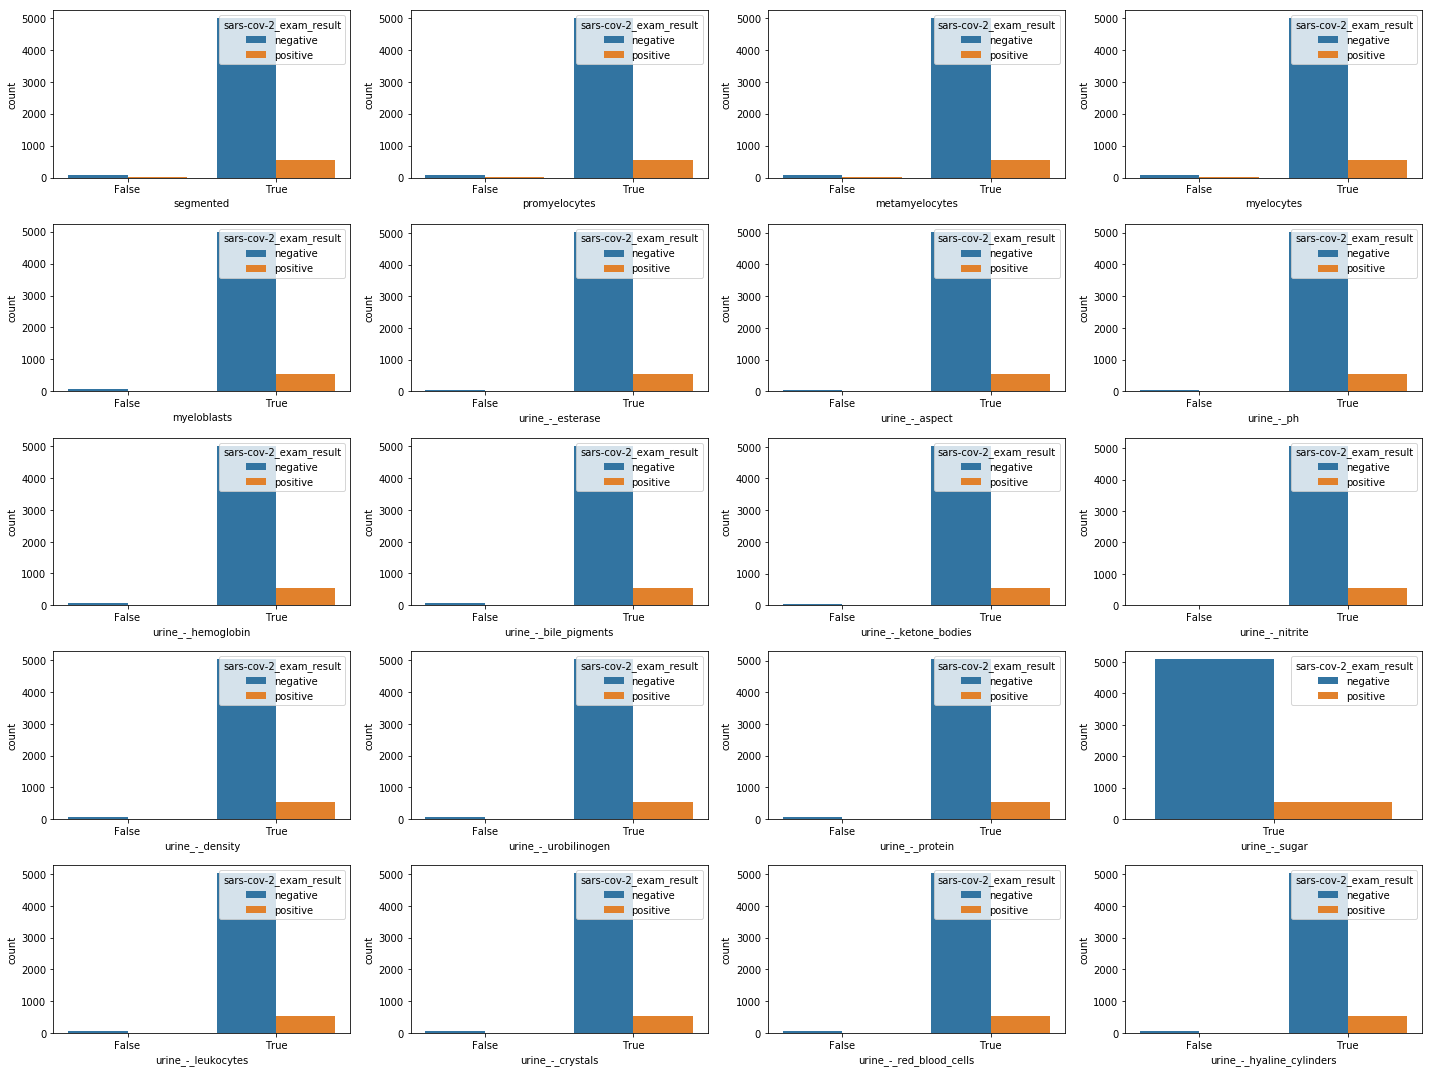

In [13]:
# PLOT - Plot NaN Bool Dataset related to sars
fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(20,15))
features_to_plot = dataset_nan.columns[64:84] # Avoid first 4 variables because they are complete and are target variables
r = 0 # Index row
c = 0 # Index col
for f in features_to_plot:
    # Count Plot
    sns.countplot(x=f, hue='sars-cov-2_exam_result', data=dataset_nan,ax=axes[r][c])
    # Plot configs
    axes[r][c].legend(title='sars-cov-2_exam_result', loc='upper right')
    # Index control
    c += 1
    if c > 3:
        c = 0
        r += 1

plt.tight_layout()

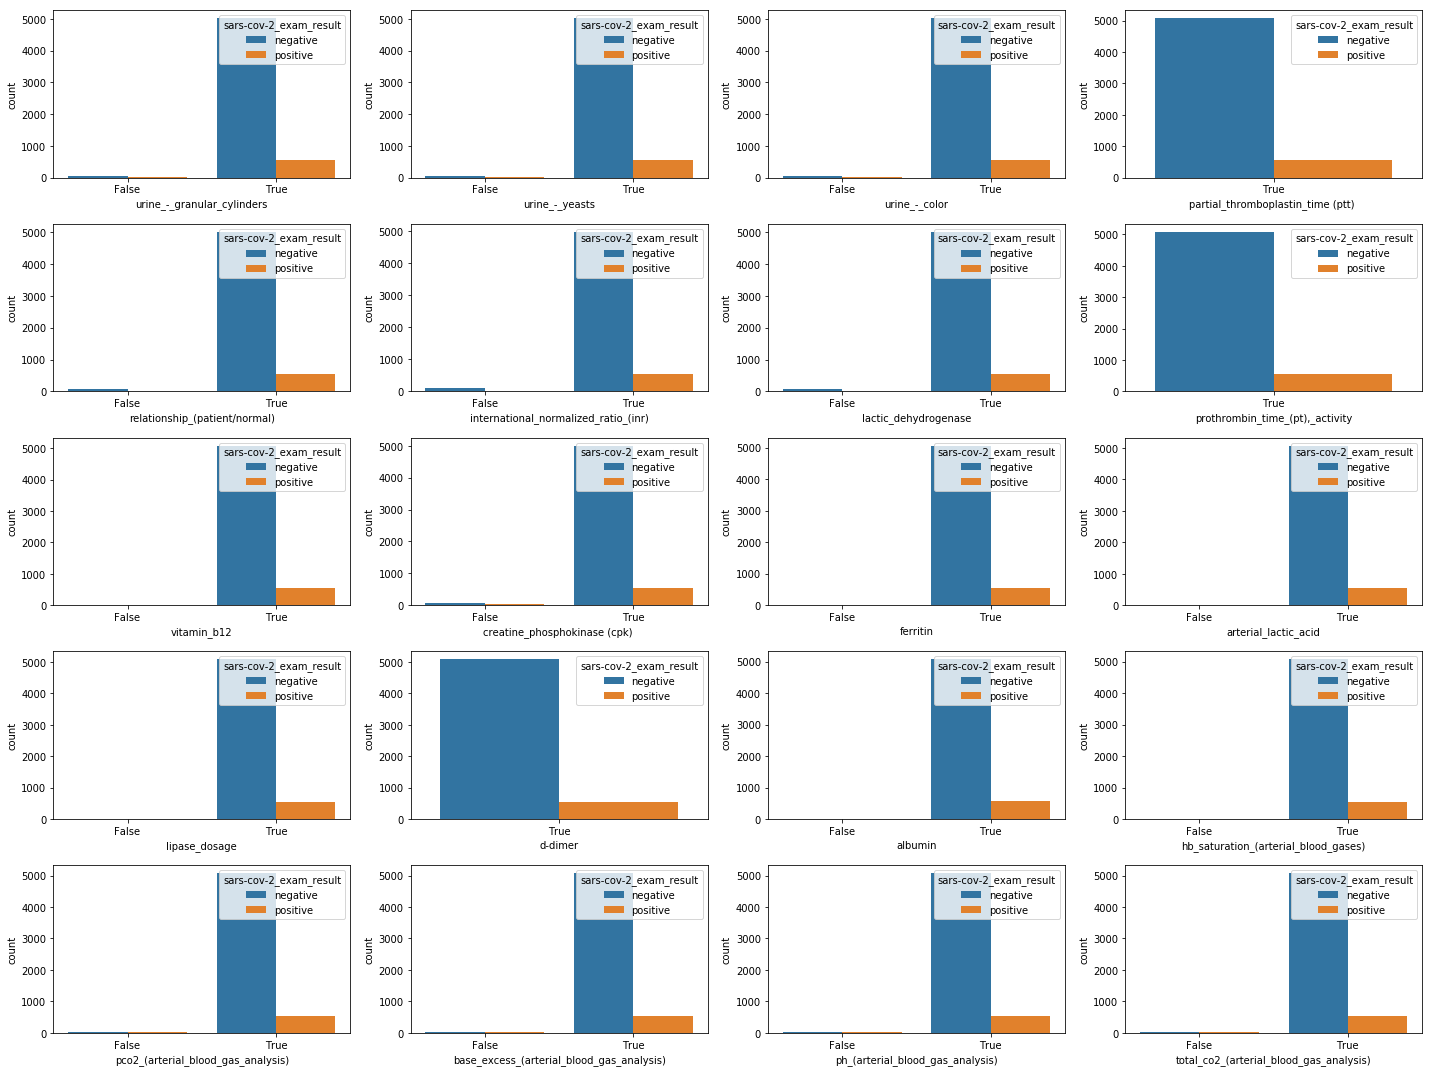

In [14]:
# PLOT - Plot NaN Bool Dataset related to sars
fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(20,15))
features_to_plot = dataset_nan.columns[84:104] # Avoid first 4 variables because they are complete and are target variables
r = 0 # Index row
c = 0 # Index col
for f in features_to_plot:
    # Count Plot
    sns.countplot(x=f, hue='sars-cov-2_exam_result', data=dataset_nan,ax=axes[r][c])
    # Plot configs
    axes[r][c].legend(title='sars-cov-2_exam_result', loc='upper right')
    # Index control
    c += 1
    if c > 3:
        c = 0
        r += 1

plt.tight_layout()

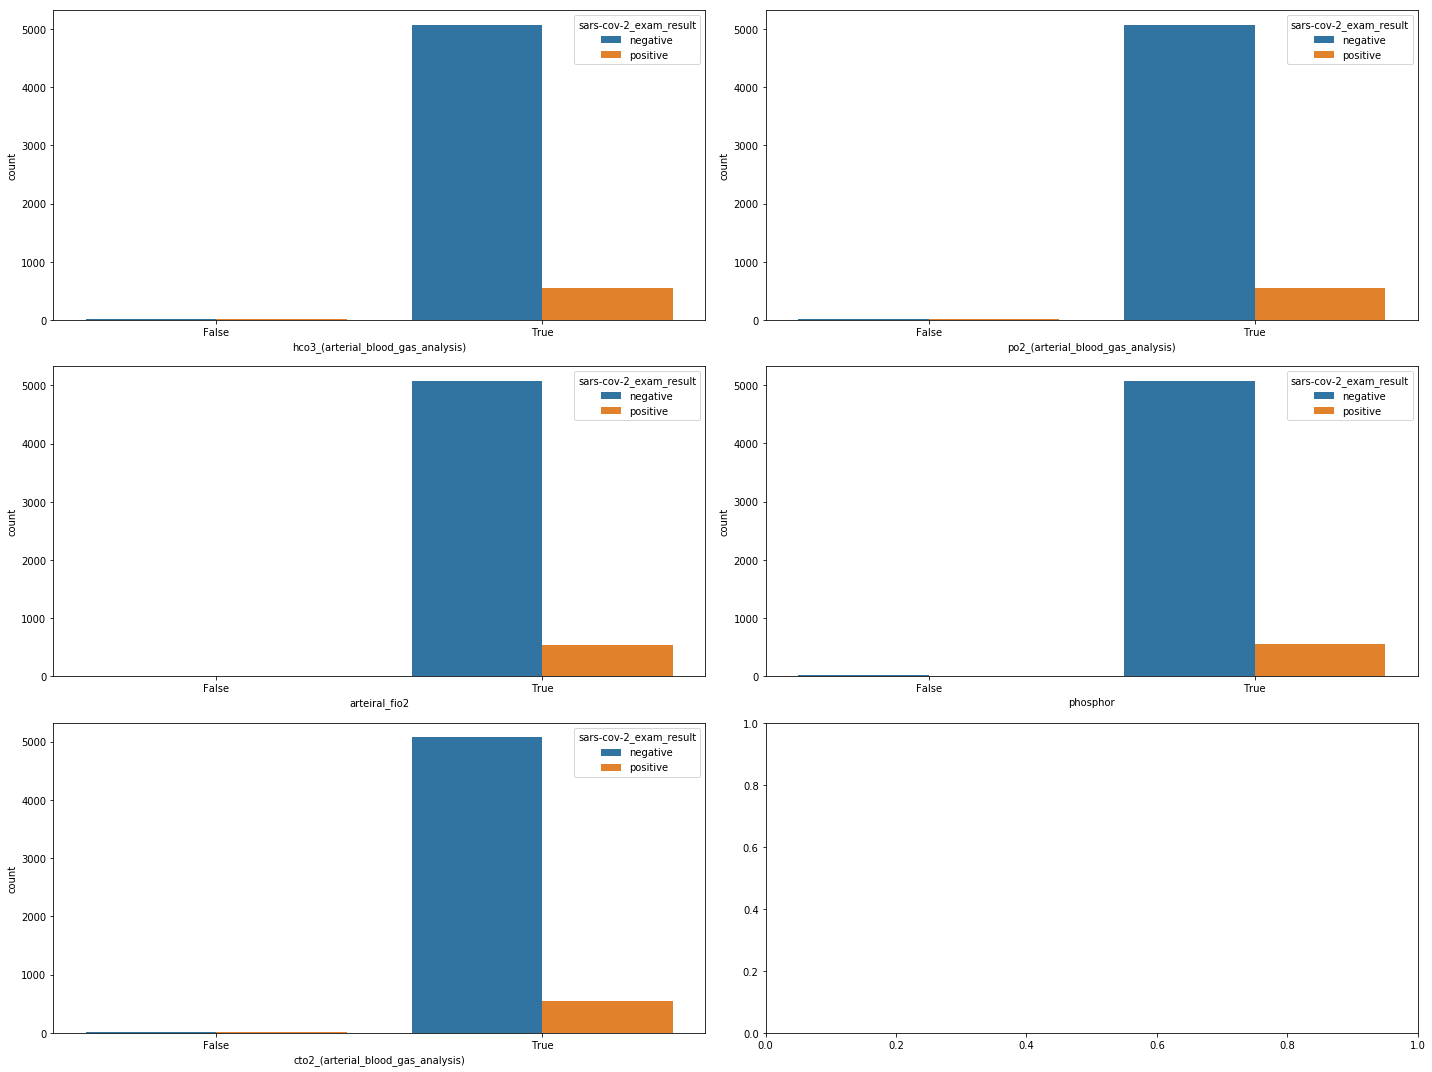

In [15]:
# PLOT - Plot NaN Bool Dataset related to sars
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(20,15))
features_to_plot = dataset_nan.columns[104:109] # Avoid first 4 variables because they are complete and are target variables
r = 0 # Index row
c = 0 # Index col
for f in features_to_plot:
    # Count Plot
    sns.countplot(x=f, hue='sars-cov-2_exam_result', data=dataset_nan,ax=axes[r][c])
    # Plot configs
    axes[r][c].legend(title='sars-cov-2_exam_result', loc='upper right')
    # Index control
    c += 1
    if c > 1:
        c = 0
        r += 1

plt.tight_layout()

From those graphs you can see:
- Doing Average imputation you may be generalizing negative cases into positive cases, which can be considered an error. Even because, how can you extrapolate the values of a positive case only with values for negative cases?
- It is possible to verify that there is a column with at all missing values, that is, a Zero imputation would add a variable without deviation and therefore useless to the model.
- Even through a Selected Case Average imputation (imputing negative cases with negative cases average and positive cases with positive cases average) can cause two problems such as: lack of a considerable samples (mainly for positive cases) to propose a representative average  or situations where positive cases do not even present samples to take the average.

Besides that Mean imputation or Zero imputation are not recommended given the diversity of imputation techniques.

So it's important to present a consistent dataset before any model, to garantee a representative prediction in the future. To continue my analysis I will develop a function to find a complete dataset respecting the ideas:
- Keep the higher number of variables
- Keep most of the rows

Given the fact that to eval all 109! dataset possibilities combinations (1.4438595832025E+176 combinations), I will propose a different approach...

### Function to find a local complete dataset
Arguments:
- ```rows_threshold``` - How many complete information each columns must have in respect to ```target_variable```
- ```target_variable``` - Target variable to evaluate previous argument
- ```df``` - Dataset to verify

The function routine is:
- Evaluate how many values each column have with respect to ```target_variable``` to filter based in ```rows_threshold``` value
- Sort this result in Ascending or Descending way
- Print how many complete rows do we have for some amount of variables as we increase the variable number in the dataset

In [16]:
def find_complete_dataset(rows_threshold, target_variable, df, asc):
    # Count how many existent values each variable have in relation to target_variable
    df_value_counts = pd.DataFrame(df.groupby(target_variable).count())
    # Create a df to keep the variables that contains: existent values >= threshold
    df_vars_threshold = pd.DataFrame(columns=['vars','values'])
    # Evaluate the variables that respect this condition
    for var in df_value_counts.columns:
        # Sum samples from groupby.count
        existent_samples = df_value_counts[var].sum()  
        if existent_samples >= rows_threshold:
            index = len(df_vars_threshold)
            df_vars_threshold.loc[index, 'vars'] = var
            df_vars_threshold.loc[index, 'values'] = existent_samples
    # Sort Descending dataframe (Assuming that higher complete values cause a best choice to keep most of the variables)
    df_vars_threshold.sort_values(by=['values'], ascending=asc, inplace=True)
    # List all variables (features) that pass the established condition 
    vars_threshold = list(df_vars_threshold['vars'])
    # Print Info
    print('### For ',rows_threshold,' rows samples complete we have ',len(vars_threshold),' possible feature variables.')
    # Verify
    for i in range(1, len(vars_threshold)+1):
        # Define the set of variables to verify
        vars_to_test = vars_threshold[0:1+len(vars_threshold)-i]
        df_model = df[vars_to_test].dropna(how='any')
        # Print Info
        print('With ', len(vars_to_test),' variables, we have ', len(df_model),' complete rows.')
    # Return sorted variables
    return vars_threshold

In [17]:
# Target variables to keep out from feature dataset
targets_out = ['patient_addmited_to_semi-intensive_unit_(1=yes,_0=no)','patient_addmited_to_intensive_care_unit_(1=yes,_0=no)',
               'patient_addmited_to_regular_ward_(1=yes,_0=no)']

# Raw data for features (keep target sars)
data = dataset_raw.drop(targets_out, axis=1)

# Eval a possible dataset given my assumption for Ascending sorting
dataset_vars_eval_asc = find_complete_dataset(rows_threshold=500, target_variable='sars-cov-2_exam_result', df=data, asc=True)

### For  500  rows samples complete we have  36  possible feature variables.
With  36  variables, we have  66  complete rows.
With  35  variables, we have  66  complete rows.
With  34  variables, we have  66  complete rows.
With  33  variables, we have  66  complete rows.
With  32  variables, we have  66  complete rows.
With  31  variables, we have  66  complete rows.
With  30  variables, we have  66  complete rows.
With  29  variables, we have  66  complete rows.
With  28  variables, we have  66  complete rows.
With  27  variables, we have  66  complete rows.
With  26  variables, we have  66  complete rows.
With  25  variables, we have  66  complete rows.
With  24  variables, we have  66  complete rows.
With  23  variables, we have  66  complete rows.
With  22  variables, we have  66  complete rows.
With  21  variables, we have  66  complete rows.
With  20  variables, we have  66  complete rows.
With  19  variables, we have  66  complete rows.
With  18  variables, we have  133  comple

In [18]:
# Eval a possible dataset given my assumption for Descending sorting
dataset_vars_eval_des = find_complete_dataset(rows_threshold=500, target_variable='sars-cov-2_exam_result', df=data, asc=False)

### For  500  rows samples complete we have  36  possible feature variables.
With  36  variables, we have  66  complete rows.
With  35  variables, we have  76  complete rows.
With  34  variables, we have  99  complete rows.
With  33  variables, we have  99  complete rows.
With  32  variables, we have  99  complete rows.
With  31  variables, we have  99  complete rows.
With  30  variables, we have  99  complete rows.
With  29  variables, we have  99  complete rows.
With  28  variables, we have  99  complete rows.
With  27  variables, we have  99  complete rows.
With  26  variables, we have  99  complete rows.
With  25  variables, we have  99  complete rows.
With  24  variables, we have  99  complete rows.
With  23  variables, we have  99  complete rows.
With  22  variables, we have  99  complete rows.
With  21  variables, we have  99  complete rows.
With  20  variables, we have  265  complete rows.
With  19  variables, we have  265  complete rows.
With  18  variables, we have  1352  com

Based in this approach, I found two possible datasets:
- Ascending way with 420 samples
- Descending way with 1352 samples

Let's explore more the results.

In [19]:
# Creating two complete datasets
## Ascending
vars_selected = ['sars-cov-2_exam_result'] + targets_out + dataset_vars_eval_asc[0:16]
df1 = dataset_raw[vars_selected].dropna(how='any')
df1.index = range(0,len(df1))
## Show info
print('### Ascending way')
for i in df1.columns:
    print(i)
## Descending
vars_selected = ['sars-cov-2_exam_result'] + targets_out + dataset_vars_eval_des[0:18]
df2 = dataset_raw[vars_selected].dropna(how='any')
df2.index = range(0,len(df2))
## Show info
print('\n### Descending way')
for i in df2.columns:
    print(i)

### Ascending way
sars-cov-2_exam_result
patient_addmited_to_semi-intensive_unit_(1=yes,_0=no)
patient_addmited_to_intensive_care_unit_(1=yes,_0=no)
patient_addmited_to_regular_ward_(1=yes,_0=no)
proteina_c_reativa_mg/dl
neutrophils
mean_platelet_volume_
monocytes
platelets
red_blood_cells
lymphocytes
mean_corpuscular_hemoglobin_concentration (mchc)
basophils
mean_corpuscular_hemoglobin_(mch)
eosinophils
mean_corpuscular_volume_(mcv)
red_blood_cell_distribution_width_(rdw)
leukocytes
hemoglobin
hematocrit

### Descending way
sars-cov-2_exam_result
patient_addmited_to_semi-intensive_unit_(1=yes,_0=no)
patient_addmited_to_intensive_care_unit_(1=yes,_0=no)
patient_addmited_to_regular_ward_(1=yes,_0=no)
patient_age_quantile
influenza_b
respiratory_syncytial_virus
influenza_a
bordetella_pertussis
inf_a_h1n1_2009
coronavirusoc43
coronavirus229e
metapneumovirus
adenovirus
chlamydophila_pneumoniae
parainfluenza_3
coronavirus_hku1
rhinovirus/enterovirus
coronavirusnl63
parainfluenza_2
parainflu

In [20]:
# View df
display(df1)

,sars-cov-2_exam_result,"patient_addmited_to_semi-intensive_unit_(1=yes,_0=no)","patient_addmited_to_intensive_care_unit_(1=yes,_0=no)","patient_addmited_to_regular_ward_(1=yes,_0=no)",proteina_c_reativa_mg/dl,neutrophils,mean_platelet_volume_,monocytes,platelets,red_blood_cells,lymphocytes,mean_corpuscular_hemoglobin_concentration (mchc),basophils,mean_corpuscular_hemoglobin_(mch),eosinophils,mean_corpuscular_volume_(mcv),red_blood_cell_distribution_width_(rdw),leukocytes,hemoglobin,hematocrit
0,negative,0,0,0,-0.147895,-0.619086,0.010677,0.357547,-0.517413,0.102004,0.318366,-0.950790,-0.223767,-0.292269,1.482158,0.166192,-0.625073,-0.094610,-0.022340,0.236515
1,negative,1,0,0,-0.286986,-0.127395,-1.672222,0.068652,1.429667,-0.850035,-0.005738,3.331071,-0.223767,0.178175,1.018625,-1.336024,-0.978899,0.364550,-0.774212,-1.571682
2,negative,0,0,0,-0.487674,0.265957,-0.550290,-0.220244,0.072992,0.542763,0.045436,-0.452899,-0.834685,0.334989,-0.709090,0.606842,0.171035,-0.211488,0.792188,0.991838
3,negative,0,0,0,-0.434025,0.651115,0.796029,0.068652,-0.178244,0.489872,-0.730707,-0.353319,2.525365,0.544077,0.217977,0.767079,0.171035,-0.075131,0.854844,1.014726
4,negative,0,0,0,-0.529401,0.347905,-0.550290,0.121178,0.361914,0.436981,-0.227493,0.642463,-0.529226,0.596348,-0.371974,0.386517,-0.713529,0.105751,0.854844,0.740064
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
415,negative,0,0,0,3.627427,1.118221,0.908221,1.066653,-0.102873,0.384090,-1.583611,-0.054585,-0.834685,-0.449085,0.892207,-0.474754,0.347948,-0.328365,0.165628,0.190738
416,negative,0,0,0,5.733660,1.134611,-0.774677,1.670707,0.663397,0.754327,-1.532437,-1.050367,0.081693,-2.174047,-0.540532,-1.976971,0.967144,1.569499,-0.523588,-0.289922
417,negative,0,0,0,0.561468,-0.061837,-0.213711,0.909074,-0.492289,0.613284,0.002791,1.538664,-0.223767,0.700891,-0.709090,0.005955,-1.155812,-0.550988,1.105468,0.717175
418,negative,0,0,0,0.609157,1.552548,-0.550290,1.381812,-1.773594,-3.318285,-1.830953,1.538664,-1.140144,2.059952,-0.582671,1.408024,-0.448160,-1.733675,-2.779203,-3.242548


In [21]:
# View df
display(df2)

,sars-cov-2_exam_result,"patient_addmited_to_semi-intensive_unit_(1=yes,_0=no)","patient_addmited_to_intensive_care_unit_(1=yes,_0=no)","patient_addmited_to_regular_ward_(1=yes,_0=no)",patient_age_quantile,influenza_b,respiratory_syncytial_virus,influenza_a,bordetella_pertussis,inf_a_h1n1_2009,...,metapneumovirus,adenovirus,chlamydophila_pneumoniae,parainfluenza_3,coronavirus_hku1,rhinovirus/enterovirus,coronavirusnl63,parainfluenza_2,parainfluenza_4,parainfluenza_1
0,negative,0,0,0,17,not_detected,not_detected,not_detected,not_detected,not_detected,...,not_detected,not_detected,not_detected,not_detected,not_detected,detected,not_detected,not_detected,not_detected,not_detected
1,negative,0,0,0,15,not_detected,not_detected,not_detected,not_detected,not_detected,...,not_detected,not_detected,not_detected,not_detected,not_detected,detected,not_detected,not_detected,not_detected,not_detected
2,negative,1,0,0,1,not_detected,not_detected,not_detected,not_detected,not_detected,...,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected
3,negative,0,0,0,17,not_detected,not_detected,not_detected,not_detected,not_detected,...,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected
4,negative,0,0,0,13,not_detected,not_detected,not_detected,not_detected,not_detected,...,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1347,negative,0,0,0,19,not_detected,not_detected,not_detected,not_detected,not_detected,...,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected
1348,negative,0,0,0,0,not_detected,detected,not_detected,not_detected,not_detected,...,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected
1349,negative,0,0,0,19,not_detected,not_detected,not_detected,not_detected,not_detected,...,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected
1350,negative,0,0,0,15,not_detected,not_detected,not_detected,not_detected,not_detected,...,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected


As you noticed, are two distincting datasets:
- Different variables
- Different type (categorical df vs numerical df)

The EDA phase will decide which dataset will be use to model development.

# Exploratory Data Analysis (EDA)


## EDA for Numerical complete local dataset

**PS**: Data already have mean 0 and std as 1.

In [22]:
# Eval 'sars-cov-2_exam_result' proportions
print('Positive case proportion - original dataset [%]: ', round(100*dataset_raw['sars-cov-2_exam_result'].value_counts()[1]/dataset_raw['sars-cov-2_exam_result'].value_counts().sum(),2))
print('Positive case proportion - numerical dataset [%]: ', round(100*df1['sars-cov-2_exam_result'].value_counts()[1]/df1['sars-cov-2_exam_result'].value_counts().sum(),2))

Positive case proportion - original dataset [%]:  9.89
Positive case proportion - numerical dataset [%]:  14.05


It's possible to see that we gain more positive proportion in this complete dataset.

In [23]:
# Eval features for 'sars-cov-2_exam_result'
## Defining our Y variables out
targets_out = ['sars-cov-2_exam_result','patient_addmited_to_semi-intensive_unit_(1=yes,_0=no)','patient_addmited_to_intensive_care_unit_(1=yes,_0=no)',
           'patient_addmited_to_regular_ward_(1=yes,_0=no)']

## Defining our X variables
feat_cols = list(set(df1.columns).difference(set(targets_out)))

## Data
data = df1[['sars-cov-2_exam_result']+feat_cols]

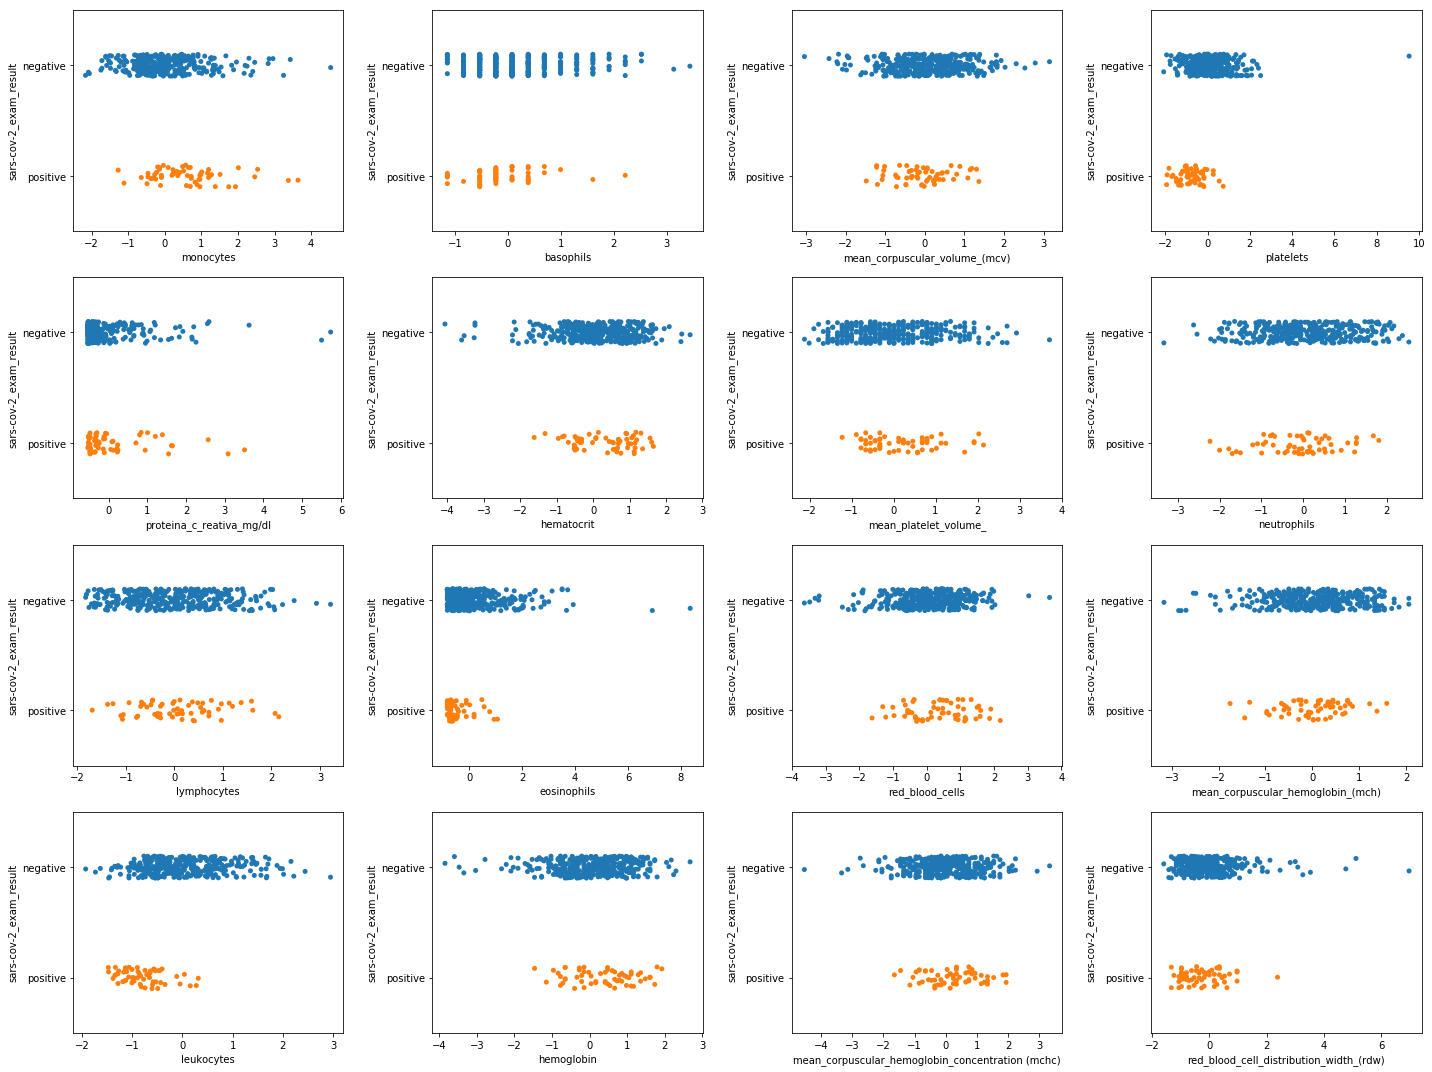

In [24]:
# PLOT - Plot NaN Bool Dataset related to sars
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(20,15))
r = 0 # Index row
c = 0 # Index col
for f in data.columns:
    if not f == 'sars-cov-2_exam_result':
        sns.stripplot(x=f, y='sars-cov-2_exam_result', data=data, ax=axes[r][c])
        #axes[r][c].legend(title='sars-cov-2_exam_result', loc='upper right')
        # Index control
        c += 1
        if c > 3:
            c = 0
            r += 1

plt.tight_layout()

From this result, I analyze that none of the variables could prove linearly exam_results (don't present boundary regions)

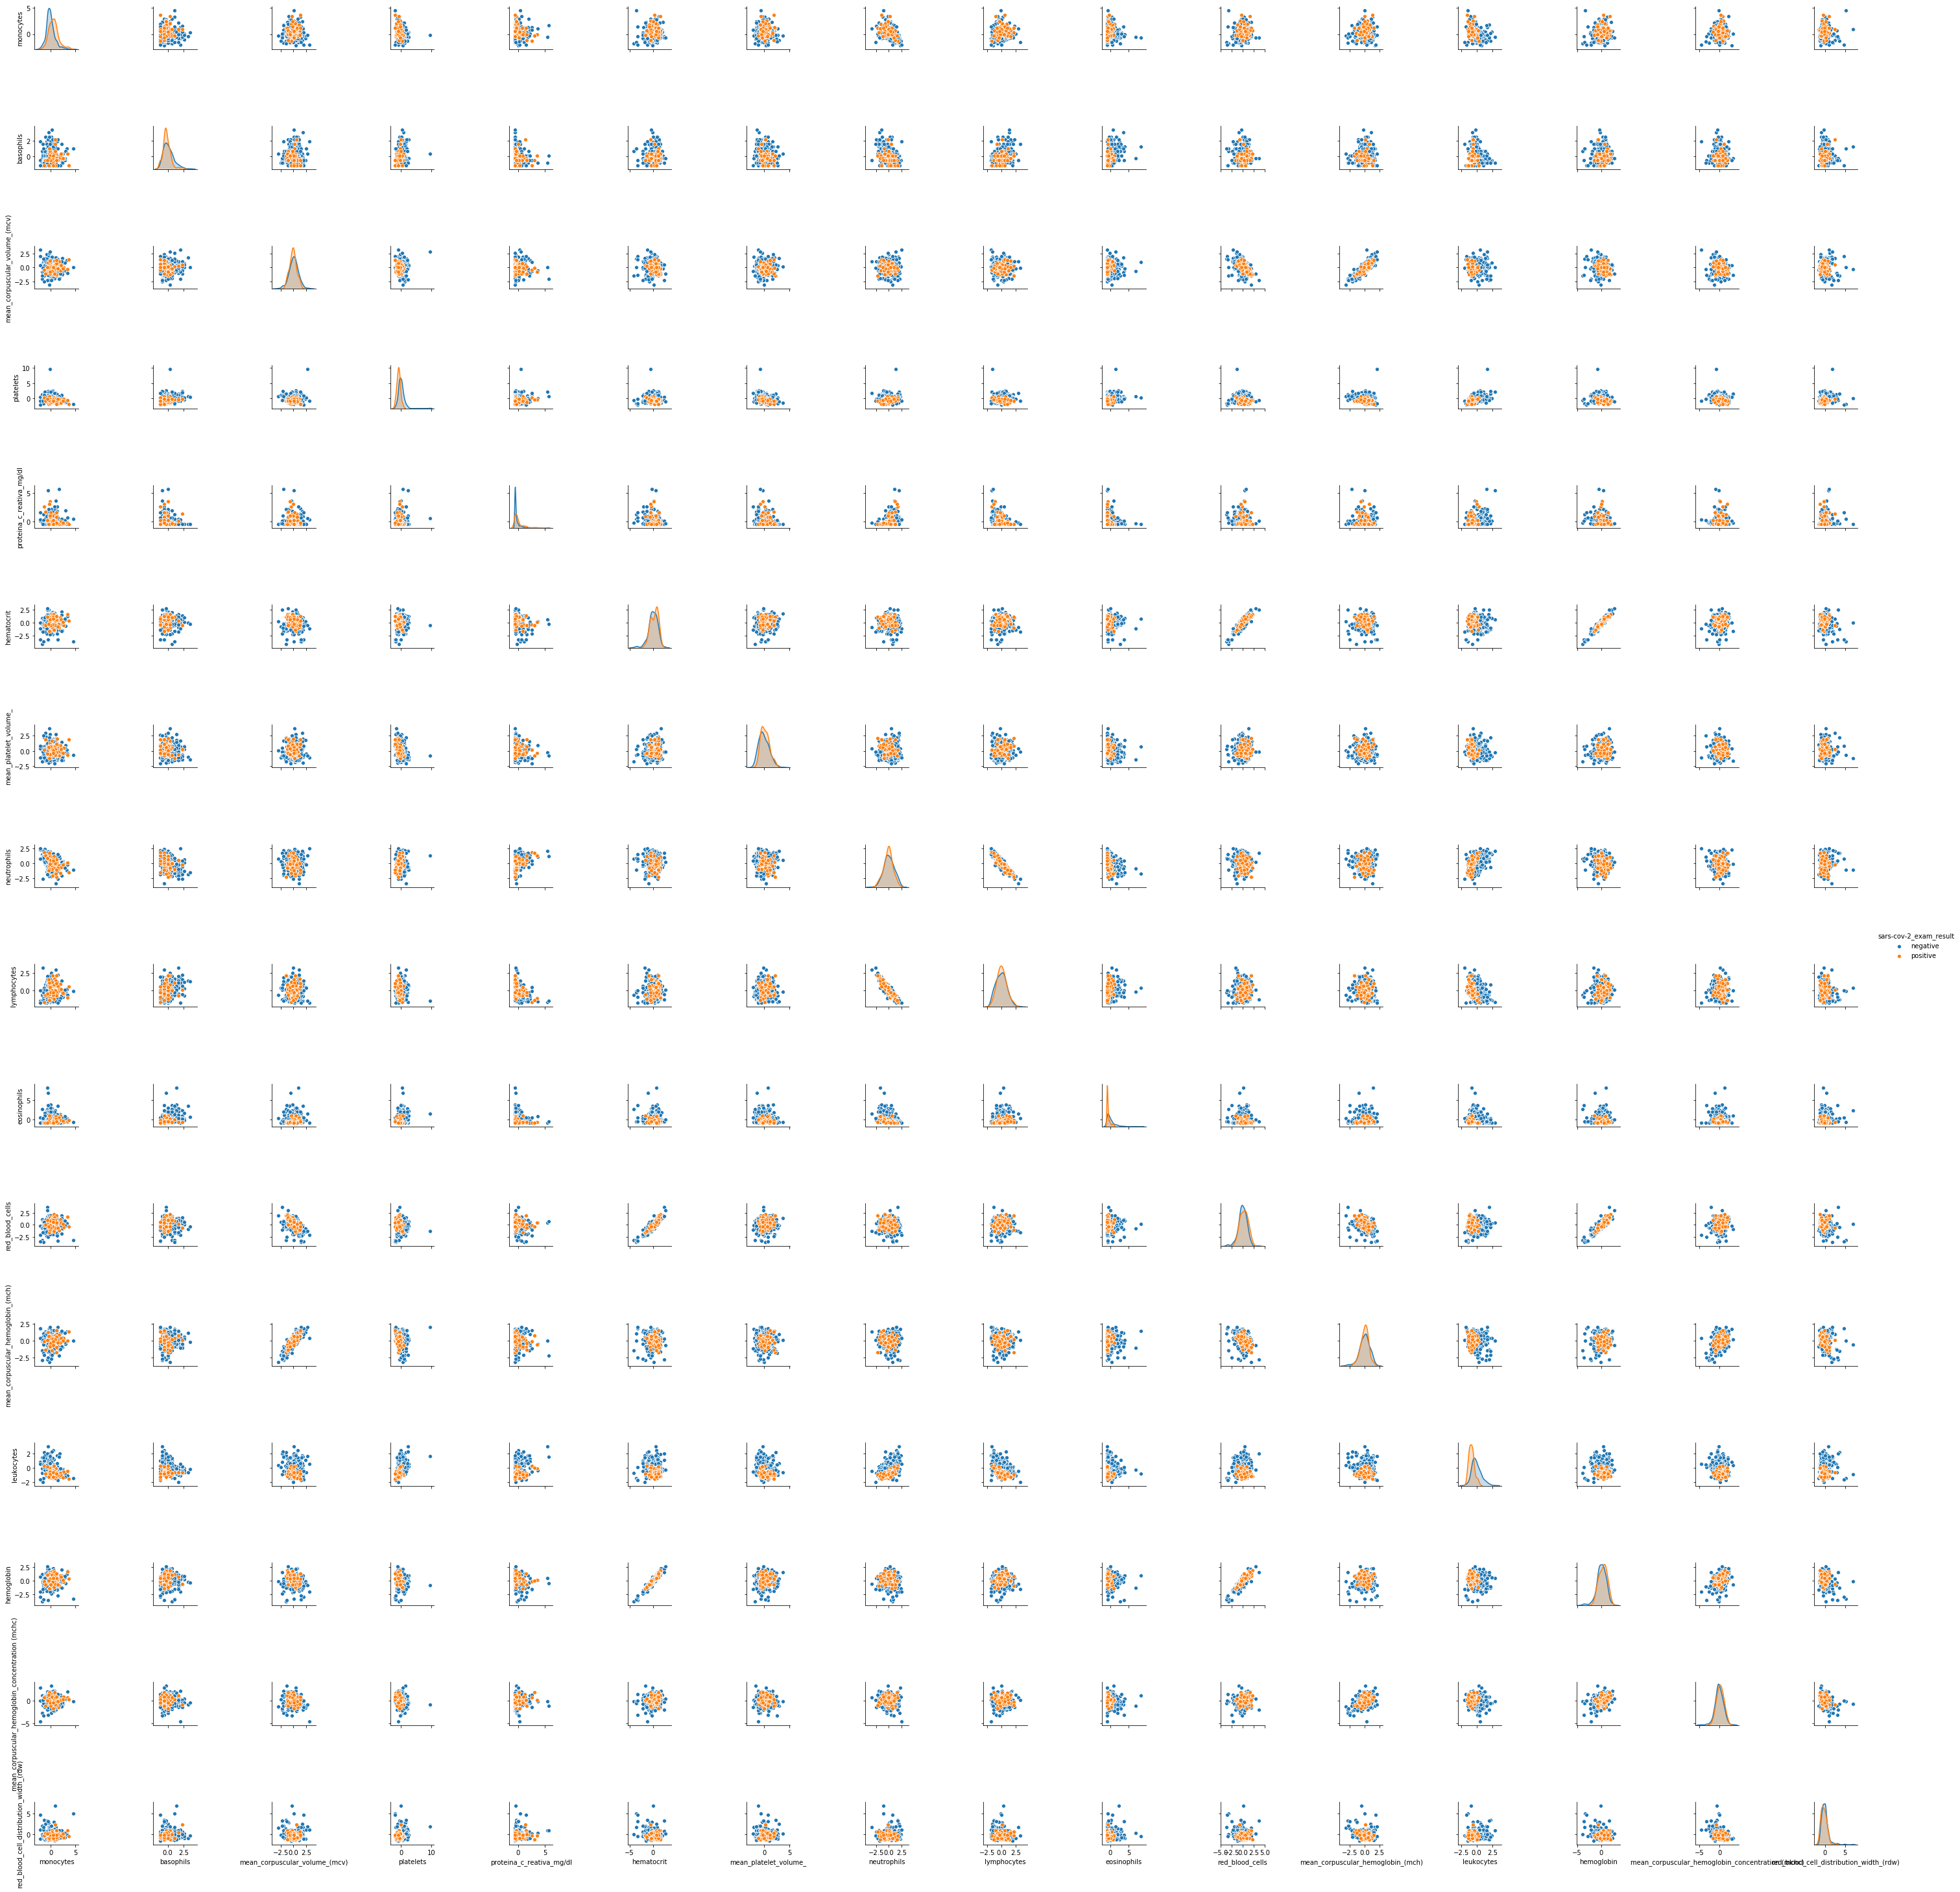

In [25]:
sns.pairplot(data, hue='sars-cov-2_exam_result')

Through this amount of plots, it's possible to see that some variables are correlated. Let's evaluate this through a correlation heatmap:

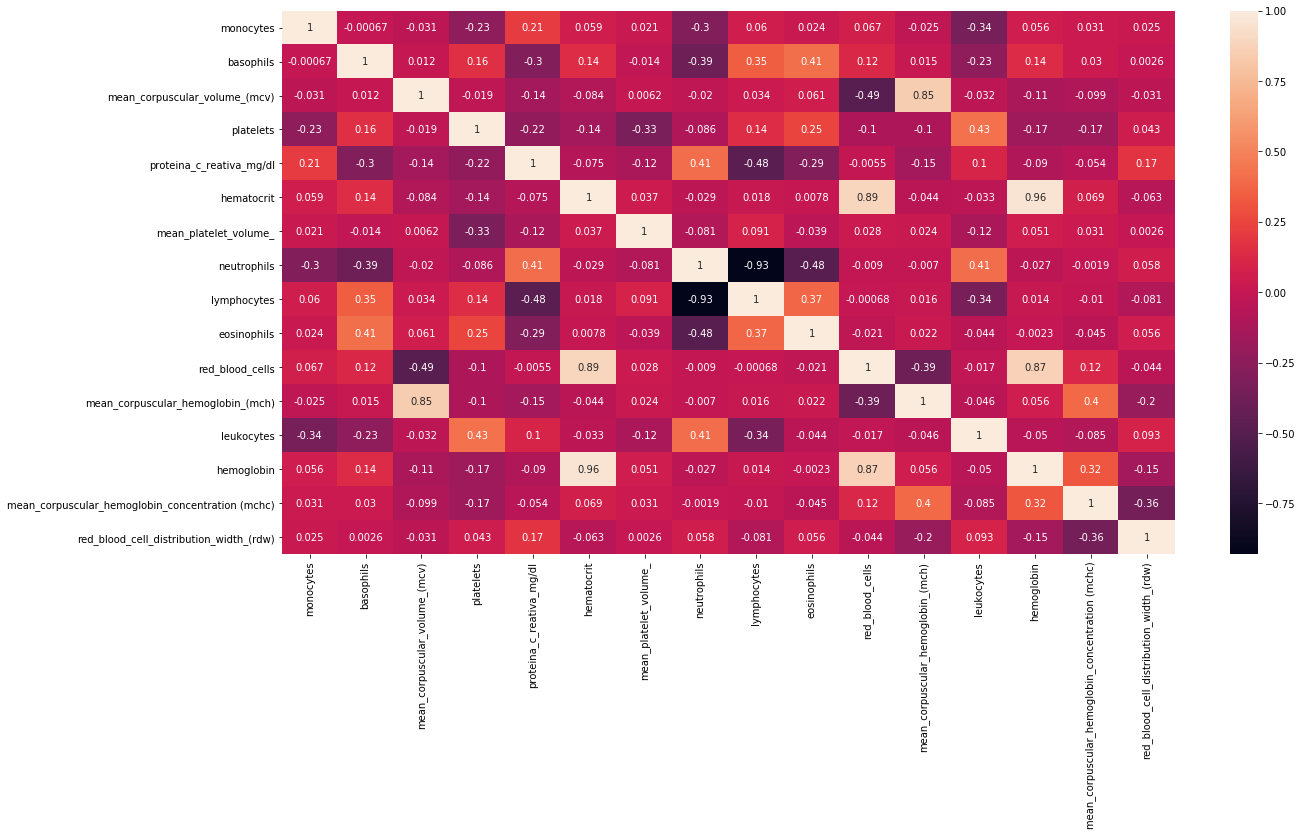

In [26]:
plt.figure(figsize=(20,10))
myBasicCorr = df1[feat_cols].corr('spearman')
sns.heatmap(myBasicCorr, annot = True)

Considering a correlation absolute threshold of 0.90 (maximum is 1), two pairs needs to be evaluate:
- neutrophils VS lymphocytes
- hemoglobin VS hematocrit

Because they are higher correlated, to decrease model complexity and noise would be necessary to remove one of them for each pair. First let's evaluate each data distribution:

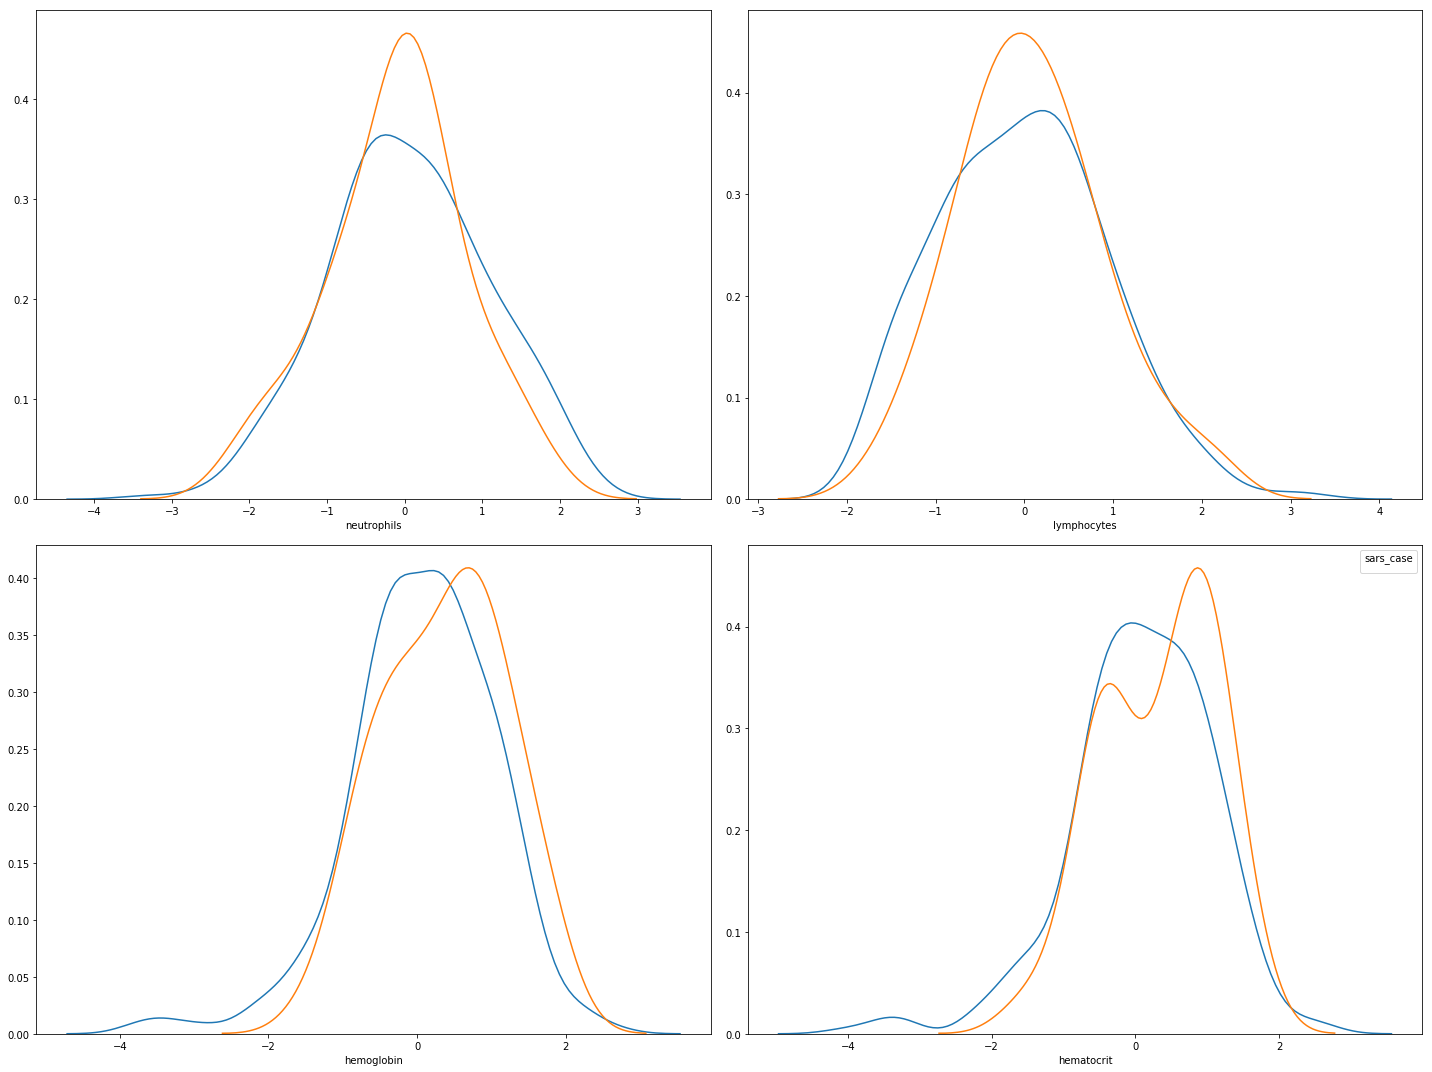

In [27]:
# Dist plot
corr_vars = ['neutrophils', 'lymphocytes', 'hemoglobin', 'hematocrit']
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20,15))
r = 0 # Index row
c = 0 # Index col
# Array for each category
target_0 = data.loc[data['sars-cov-2_exam_result'] == 'negative']
target_1 = data.loc[data['sars-cov-2_exam_result'] == 'positive']
# Plot process
for f in corr_vars:
        sns.distplot(target_0[f], hist=False, ax=axes[r][c])
        sns.distplot(target_1[f], hist=False, ax=axes[r][c])
        plt.legend(title='sars_case')
        c += 1
        if c > 1:
            c = 0
            r += 1

plt.tight_layout()

Based on the distribution, I will keep: ```hematocrit``` and ```lymphocytes``` most because the distinguished difference between positive/negative cases distributions.

In [28]:
# Atualize main df
df1.drop(['hemoglobin', 'neutrophils'], axis=1, inplace=True)

Now, for continuos dataset we have 16 features!

## EDA for Categorical complete local dataset

In [29]:
# Eval 'sars-cov-2_exam_result' proportions
print('Positive case proportion - original dataset [%]: ', round(100*dataset_raw['sars-cov-2_exam_result'].value_counts()[1]/dataset_raw['sars-cov-2_exam_result'].value_counts().sum(),2))
print('Positive case proportion - numerical dataset [%]: ', round(100*df2['sars-cov-2_exam_result'].value_counts()[1]/df2['sars-cov-2_exam_result'].value_counts().sum(),2))

Positive case proportion - original dataset [%]:  9.89
Positive case proportion - numerical dataset [%]:  8.28


Different from numerical dataset, was lost positive proportion having a more unbalanced dataset.

In [30]:
# Eval features for 'sars-cov-2_exam_result'
## Defining our Y variables out
targets_out = ['sars-cov-2_exam_result','patient_addmited_to_semi-intensive_unit_(1=yes,_0=no)','patient_addmited_to_intensive_care_unit_(1=yes,_0=no)',
           'patient_addmited_to_regular_ward_(1=yes,_0=no)']

## Defining our X variables
feat_cols = list(set(df2.columns).difference(set(targets_out)))

## Data
data = df2[['sars-cov-2_exam_result']+feat_cols]

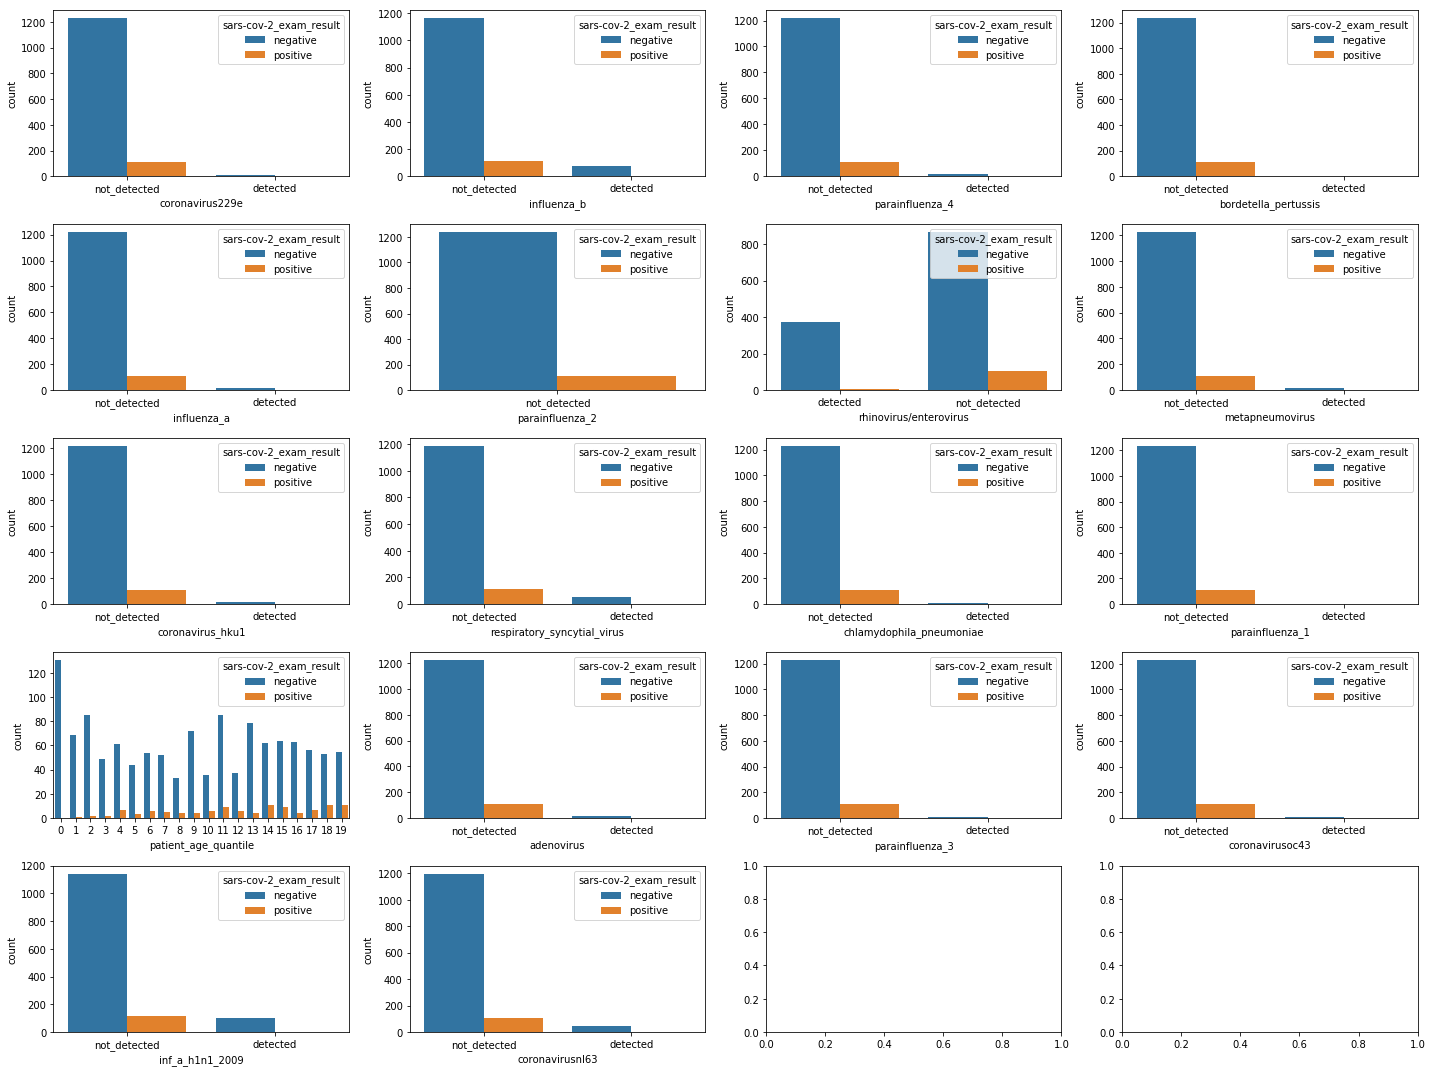

In [31]:
# PLOT - Barplots over our variables
fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(20,15))
r = 0 # Index row
c = 0 # Index col
for f in feat_cols:
    # Count Plot
    sns.countplot(x=f, hue='sars-cov-2_exam_result', data=data,ax=axes[r][c])
    # Plot configs
    axes[r][c].legend(title='sars-cov-2_exam_result', loc='upper right')
    # Index control
    c += 1
    if c > 3:
        c = 0
        r += 1

plt.tight_layout()

Given the fact that most of the variables just present one category with positive samples and target variable proportion lost, **I will discontinue the study in discrete dataset**.

# Predictive Analysis - General Information
For both tasks, those infos are necessary to a better comprehension.

## Why Support Vector Machine (SVM)
- It's is a robust model, before deep learning explosion as one of the most used
- Works really well with small datasets, as I only have 420 samples. This statement is not applied for Deep Learning models that requires a lot of data to work a correct generalization.
- It's a powerful binary classifier and this problem is a binary classification (TASK 1). Nonetheless, can be applied for multi-class problem (TASK 2)

## Measures againts imbalanced target class
All targets for task 1 and 2 are unbalanced, to avoid this I proposed:
- Train/Test split stratified
- Stratified K-Fold Cross-Validation, keeping the proportion between train/validation split
- Cross Validation Analysis to avoid possible overfit due to small dataset
- Score metrics - balanced accuracy
- Evaluate confusion matrix results besides accuracy

**PS**: Stratify keeps the same proportion for target categories in spliting process.

## Steps for model development
- Prepare the continuous dataset
- Split a test set to verify the metrics
- Grid Search Stratified KFold Cross Validation for SVM Classifier
- Evaluate Metrics

## Metrics details
Will be evaluated **balanced accuracy** and a **confusion matrix report**. To understand the last one, let me explaing a binary confusion matrix:

![cm](https://user-images.githubusercontent.com/32513366/77873202-aec63780-721f-11ea-9955-08e3860e2a01.PNG)

Column - Predicted value
Row - Real value

As the target variable is medical in nature, each value in the confusion matrix has a meaning:
- TP (True Positive): If a pacient present COVID-19 and the model predict correct
- TN (True Negative): If a pacient don't present COVID-19 and the model predict correct
- FP (False Positive): If a pacient don't present COVID-19 and the model says that he's infected
- FN (False Negative): If a pacient present COVID-19, but the model says that he's fine

Given the actual world situation, I considered **FN error the worst**: the pacient after getting out from the hospital could infect others. I will considered **recall** and **accuracy** as the most important measures for this study.

# Task 1
**Predict confirmed COVID-19 cases among suspected cases. Based on the results of laboratory tests commonly collected for a suspected COVID-19 case during a visit to the emergency room, would it be possible to predict the test result for SARS-Cov-2 (positive/negative)?**

### Prepare the continuous dataset

In [32]:
## Defining our X variables
feat_cols = list(set(df1.columns).difference(set(targets_out)))

## Setting Binary values - One Hot Encode
df1.loc[df1['sars-cov-2_exam_result'] == 'positive', 'sars-cov-2_exam_result'] = 1
df1.loc[df1['sars-cov-2_exam_result'] == 'negative', 'sars-cov-2_exam_result'] = 0

### Split a test set to verify the metrics

In [33]:
x_train, x_test, y_train, y_test = train_test_split(df1[feat_cols], df1['sars-cov-2_exam_result'], test_size = 0.20, random_state = 1206, stratify=df1['sars-cov-2_exam_result'])

### Grid Search Stratified KFold Cross Validation for SVM Classifier

In [34]:
# Defining parameter range to grid search
param_gridSVM = {'C': [0.1, 1, 10, 100, 1000],
                 'shrinking':[True, False],
                 'gamma': ['scale', 'auto', 1, 0.1, 0.01, 0.001, 0.0001], 
                 'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}  

# Define grid instance
gridSVM = GridSearchCV(cv=5, estimator=SVC(class_weight='balanced', random_state=101), param_grid=param_gridSVM, refit = True, verbose = 0, scoring='balanced_accuracy') 

# Initialize grid search, fitting the best model
gridSVM.fit(x_train, y_train)

Fitting 5 folds for each of 280 candidates, totalling 1400 fits
[CV] C=0.1, gamma=scale, kernel=linear, shrinking=True ...............
[CV]  C=0.1, gamma=scale, kernel=linear, shrinking=True, score=0.797, total=   0.0s
[CV] C=0.1, gamma=scale, kernel=linear, shrinking=True ...............
[CV]  C=0.1, gamma=scale, kernel=linear, shrinking=True, score=0.904, total=   0.0s
[CV] C=0.1, gamma=scale, kernel=linear, shrinking=True ...............
[CV]  C=0.1, gamma=scale, kernel=linear, shrinking=True, score=0.773, total=   0.0s
[CV] C=0.1, gamma=scale, kernel=linear, shrinking=True ...............
[CV]  C=0.1, gamma=scale, kernel=linear, shrinking=True, score=0.777, total=   0.0s
[CV] C=0.1, gamma=scale, kernel=linear, shrinking=True ...............
[CV]  C=0.1, gamma=scale, kernel=linear, shrinking=True, score=0.914, total=   0.0s
[CV] C=0.1, gamma=scale, kernel=linear, shrinking=False ..............
[CV]  C=0.1, gamma=scale, kernel=linear, shrinking=False, score=0.797, total=   0.0s
[CV] 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV]  C=0.1, gamma=scale, kernel=rbf, shrinking=True, score=0.845, total=   0.0s
[CV] C=0.1, gamma=scale, kernel=rbf, shrinking=True ..................
[CV]  C=0.1, gamma=scale, kernel=rbf, shrinking=True, score=0.829, total=   0.0s
[CV] C=0.1, gamma=scale, kernel=rbf, shrinking=True ..................
[CV]  C=0.1, gamma=scale, kernel=rbf, shrinking=True, score=0.721, total=   0.0s
[CV] C=0.1, gamma=scale, kernel=rbf, shrinking=True ..................
[CV]  C=0.1, gamma=scale, kernel=rbf, shrinking=True, score=0.957, total=   0.0s
[CV] C=0.1, gamma=scale, kernel=rbf, shrinking=False .................
[CV]  C=0.1, gamma=scale, kernel=rbf, shrinking=False, score=0.814, total=   0.0s
[CV] C=0.1, gamma=scale, kernel=rbf, shrinking=False .................
[CV]  C=0.1, gamma=scale, kernel=rbf, shrinking=False, score=0.845, total=   0.0s
[CV] C=0.1, gamma=scale, kernel=rbf, shrinking=False .................
[CV]  C=0.1, gamma=scale, kernel=rbf, shrinking=False, score=0.829, total=   0.0s
[CV]

[CV]  C=0.1, gamma=1, kernel=linear, shrinking=True, score=0.777, total=   0.0s
[CV] C=0.1, gamma=1, kernel=linear, shrinking=True ...................
[CV]  C=0.1, gamma=1, kernel=linear, shrinking=True, score=0.914, total=   0.0s
[CV] C=0.1, gamma=1, kernel=linear, shrinking=False ..................
[CV]  C=0.1, gamma=1, kernel=linear, shrinking=False, score=0.797, total=   0.0s
[CV] C=0.1, gamma=1, kernel=linear, shrinking=False ..................
[CV]  C=0.1, gamma=1, kernel=linear, shrinking=False, score=0.904, total=   0.0s
[CV] C=0.1, gamma=1, kernel=linear, shrinking=False ..................
[CV]  C=0.1, gamma=1, kernel=linear, shrinking=False, score=0.773, total=   0.0s
[CV] C=0.1, gamma=1, kernel=linear, shrinking=False ..................
[CV]  C=0.1, gamma=1, kernel=linear, shrinking=False, score=0.777, total=   0.0s
[CV] C=0.1, gamma=1, kernel=linear, shrinking=False ..................
[CV]  C=0.1, gamma=1, kernel=linear, shrinking=False, score=0.914, total=   0.0s
[CV] C=0.

[CV]  C=0.1, gamma=0.1, kernel=rbf, shrinking=False, score=0.814, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf, shrinking=False ...................
[CV]  C=0.1, gamma=0.1, kernel=rbf, shrinking=False, score=0.862, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf, shrinking=False ...................
[CV]  C=0.1, gamma=0.1, kernel=rbf, shrinking=False, score=0.790, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf, shrinking=False ...................
[CV]  C=0.1, gamma=0.1, kernel=rbf, shrinking=False, score=0.730, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf, shrinking=False ...................
[CV]  C=0.1, gamma=0.1, kernel=rbf, shrinking=False, score=0.957, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=sigmoid, shrinking=True ................
[CV]  C=0.1, gamma=0.1, kernel=sigmoid, shrinking=True, score=0.788, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=sigmoid, shrinking=True ................
[CV]  C=0.1, gamma=0.1, kernel=sigmoid, shrinking=True, score=0.886, total=   0.0s
[CV] C=0

[CV]  C=0.1, gamma=0.001, kernel=linear, shrinking=False, score=0.777, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=linear, shrinking=False ..............
[CV]  C=0.1, gamma=0.001, kernel=linear, shrinking=False, score=0.914, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=poly, shrinking=True .................
[CV]  C=0.1, gamma=0.001, kernel=poly, shrinking=True, score=0.500, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=poly, shrinking=True .................
[CV]  C=0.1, gamma=0.001, kernel=poly, shrinking=True, score=0.500, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=poly, shrinking=True .................
[CV]  C=0.1, gamma=0.001, kernel=poly, shrinking=True, score=0.500, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=poly, shrinking=True .................
[CV]  C=0.1, gamma=0.001, kernel=poly, shrinking=True, score=0.500, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=poly, shrinking=True .................
[CV]  C=0.1, gamma=0.001, kernel=poly, shrinking=True, score=0.500, total=  

[CV]  C=0.1, gamma=0.0001, kernel=sigmoid, shrinking=True, score=0.500, total=   0.0s
[CV] C=0.1, gamma=0.0001, kernel=sigmoid, shrinking=True .............
[CV]  C=0.1, gamma=0.0001, kernel=sigmoid, shrinking=True, score=0.500, total=   0.0s
[CV] C=0.1, gamma=0.0001, kernel=sigmoid, shrinking=True .............
[CV]  C=0.1, gamma=0.0001, kernel=sigmoid, shrinking=True, score=0.500, total=   0.0s
[CV] C=0.1, gamma=0.0001, kernel=sigmoid, shrinking=False ............
[CV]  C=0.1, gamma=0.0001, kernel=sigmoid, shrinking=False, score=0.500, total=   0.0s
[CV] C=0.1, gamma=0.0001, kernel=sigmoid, shrinking=False ............
[CV]  C=0.1, gamma=0.0001, kernel=sigmoid, shrinking=False, score=0.500, total=   0.0s
[CV] C=0.1, gamma=0.0001, kernel=sigmoid, shrinking=False ............
[CV]  C=0.1, gamma=0.0001, kernel=sigmoid, shrinking=False, score=0.500, total=   0.0s
[CV] C=0.1, gamma=0.0001, kernel=sigmoid, shrinking=False ............
[CV]  C=0.1, gamma=0.0001, kernel=sigmoid, shrinking=Fa

[CV]  C=1, gamma=auto, kernel=poly, shrinking=False, score=0.709, total=   0.0s
[CV] C=1, gamma=auto, kernel=rbf, shrinking=True .....................
[CV]  C=1, gamma=auto, kernel=rbf, shrinking=True, score=0.764, total=   0.0s
[CV] C=1, gamma=auto, kernel=rbf, shrinking=True .....................
[CV]  C=1, gamma=auto, kernel=rbf, shrinking=True, score=0.871, total=   0.0s
[CV] C=1, gamma=auto, kernel=rbf, shrinking=True .....................
[CV]  C=1, gamma=auto, kernel=rbf, shrinking=True, score=0.743, total=   0.0s
[CV] C=1, gamma=auto, kernel=rbf, shrinking=True .....................
[CV]  C=1, gamma=auto, kernel=rbf, shrinking=True, score=0.657, total=   0.0s
[CV] C=1, gamma=auto, kernel=rbf, shrinking=True .....................
[CV]  C=1, gamma=auto, kernel=rbf, shrinking=True, score=0.931, total=   0.0s
[CV] C=1, gamma=auto, kernel=rbf, shrinking=False ....................
[CV]  C=1, gamma=auto, kernel=rbf, shrinking=False, score=0.764, total=   0.0s
[CV] C=1, gamma=auto, ker

[CV]  C=1, gamma=0.1, kernel=linear, shrinking=True, score=0.726, total=   0.0s
[CV] C=1, gamma=0.1, kernel=linear, shrinking=True ...................
[CV]  C=1, gamma=0.1, kernel=linear, shrinking=True, score=0.730, total=   0.0s
[CV] C=1, gamma=0.1, kernel=linear, shrinking=True ...................
[CV]  C=1, gamma=0.1, kernel=linear, shrinking=True, score=0.867, total=   0.0s
[CV] C=1, gamma=0.1, kernel=linear, shrinking=False ..................
[CV]  C=1, gamma=0.1, kernel=linear, shrinking=False, score=0.805, total=   0.0s
[CV] C=1, gamma=0.1, kernel=linear, shrinking=False ..................
[CV]  C=1, gamma=0.1, kernel=linear, shrinking=False, score=0.904, total=   0.0s
[CV] C=1, gamma=0.1, kernel=linear, shrinking=False ..................
[CV]  C=1, gamma=0.1, kernel=linear, shrinking=False, score=0.726, total=   0.0s
[CV] C=1, gamma=0.1, kernel=linear, shrinking=False ..................
[CV]  C=1, gamma=0.1, kernel=linear, shrinking=False, score=0.730, total=   0.0s
[CV] C=1, 

[CV]  C=1, gamma=0.01, kernel=rbf, shrinking=False, score=0.811, total=   0.0s
[CV] C=1, gamma=0.01, kernel=rbf, shrinking=False ....................
[CV]  C=1, gamma=0.01, kernel=rbf, shrinking=False, score=0.777, total=   0.0s
[CV] C=1, gamma=0.01, kernel=rbf, shrinking=False ....................
[CV]  C=1, gamma=0.01, kernel=rbf, shrinking=False, score=0.914, total=   0.0s
[CV] C=1, gamma=0.01, kernel=sigmoid, shrinking=True .................
[CV]  C=1, gamma=0.01, kernel=sigmoid, shrinking=True, score=0.805, total=   0.0s
[CV] C=1, gamma=0.01, kernel=sigmoid, shrinking=True .................
[CV]  C=1, gamma=0.01, kernel=sigmoid, shrinking=True, score=0.886, total=   0.0s
[CV] C=1, gamma=0.01, kernel=sigmoid, shrinking=True .................
[CV]  C=1, gamma=0.01, kernel=sigmoid, shrinking=True, score=0.803, total=   0.0s
[CV] C=1, gamma=0.01, kernel=sigmoid, shrinking=True .................
[CV]  C=1, gamma=0.01, kernel=sigmoid, shrinking=True, score=0.824, total=   0.0s
[CV] C=1,

[CV]  C=1, gamma=0.0001, kernel=linear, shrinking=False, score=0.730, total=   0.0s
[CV] C=1, gamma=0.0001, kernel=linear, shrinking=False ...............
[CV]  C=1, gamma=0.0001, kernel=linear, shrinking=False, score=0.867, total=   0.0s
[CV] C=1, gamma=0.0001, kernel=poly, shrinking=True ..................
[CV]  C=1, gamma=0.0001, kernel=poly, shrinking=True, score=0.500, total=   0.0s
[CV] C=1, gamma=0.0001, kernel=poly, shrinking=True ..................
[CV]  C=1, gamma=0.0001, kernel=poly, shrinking=True, score=0.500, total=   0.0s
[CV] C=1, gamma=0.0001, kernel=poly, shrinking=True ..................
[CV]  C=1, gamma=0.0001, kernel=poly, shrinking=True, score=0.500, total=   0.0s
[CV] C=1, gamma=0.0001, kernel=poly, shrinking=True ..................
[CV]  C=1, gamma=0.0001, kernel=poly, shrinking=True, score=0.500, total=   0.0s
[CV] C=1, gamma=0.0001, kernel=poly, shrinking=True ..................
[CV]  C=1, gamma=0.0001, kernel=poly, shrinking=True, score=0.500, total=   0.0s
[

[CV]  C=10, gamma=scale, kernel=sigmoid, shrinking=False, score=0.753, total=   0.0s
[CV] C=10, gamma=scale, kernel=sigmoid, shrinking=False ..............
[CV]  C=10, gamma=scale, kernel=sigmoid, shrinking=False, score=0.768, total=   0.0s
[CV] C=10, gamma=scale, kernel=sigmoid, shrinking=False ..............
[CV]  C=10, gamma=scale, kernel=sigmoid, shrinking=False, score=0.803, total=   0.0s
[CV] C=10, gamma=scale, kernel=sigmoid, shrinking=False ..............
[CV]  C=10, gamma=scale, kernel=sigmoid, shrinking=False, score=0.739, total=   0.0s
[CV] C=10, gamma=scale, kernel=sigmoid, shrinking=False ..............
[CV]  C=10, gamma=scale, kernel=sigmoid, shrinking=False, score=0.824, total=   0.0s
[CV] C=10, gamma=auto, kernel=linear, shrinking=True .................
[CV]  C=10, gamma=auto, kernel=linear, shrinking=True, score=0.805, total=   0.0s
[CV] C=10, gamma=auto, kernel=linear, shrinking=True .................
[CV]  C=10, gamma=auto, kernel=linear, shrinking=True, score=0.886,

[CV]  C=10, gamma=1, kernel=rbf, shrinking=True, score=0.500, total=   0.0s
[CV] C=10, gamma=1, kernel=rbf, shrinking=True .......................
[CV]  C=10, gamma=1, kernel=rbf, shrinking=True, score=0.500, total=   0.0s
[CV] C=10, gamma=1, kernel=rbf, shrinking=True .......................
[CV]  C=10, gamma=1, kernel=rbf, shrinking=True, score=0.500, total=   0.0s
[CV] C=10, gamma=1, kernel=rbf, shrinking=True .......................
[CV]  C=10, gamma=1, kernel=rbf, shrinking=True, score=0.500, total=   0.0s
[CV] C=10, gamma=1, kernel=rbf, shrinking=False ......................
[CV]  C=10, gamma=1, kernel=rbf, shrinking=False, score=0.500, total=   0.0s
[CV] C=10, gamma=1, kernel=rbf, shrinking=False ......................
[CV]  C=10, gamma=1, kernel=rbf, shrinking=False, score=0.500, total=   0.0s
[CV] C=10, gamma=1, kernel=rbf, shrinking=False ......................
[CV]  C=10, gamma=1, kernel=rbf, shrinking=False, score=0.500, total=   0.0s
[CV] C=10, gamma=1, kernel=rbf, shrinki

[CV]  C=10, gamma=0.01, kernel=linear, shrinking=True, score=0.739, total=   0.0s
[CV] C=10, gamma=0.01, kernel=linear, shrinking=True .................
[CV]  C=10, gamma=0.01, kernel=linear, shrinking=True, score=0.867, total=   0.0s
[CV] C=10, gamma=0.01, kernel=linear, shrinking=False ................
[CV]  C=10, gamma=0.01, kernel=linear, shrinking=False, score=0.805, total=   0.0s
[CV] C=10, gamma=0.01, kernel=linear, shrinking=False ................
[CV]  C=10, gamma=0.01, kernel=linear, shrinking=False, score=0.886, total=   0.0s
[CV] C=10, gamma=0.01, kernel=linear, shrinking=False ................
[CV]  C=10, gamma=0.01, kernel=linear, shrinking=False, score=0.726, total=   0.0s
[CV] C=10, gamma=0.01, kernel=linear, shrinking=False ................
[CV]  C=10, gamma=0.01, kernel=linear, shrinking=False, score=0.739, total=   0.0s
[CV] C=10, gamma=0.01, kernel=linear, shrinking=False ................
[CV]  C=10, gamma=0.01, kernel=linear, shrinking=False, score=0.867, total=   

[CV]  C=10, gamma=0.001, kernel=sigmoid, shrinking=False, score=0.805, total=   0.0s
[CV] C=10, gamma=0.001, kernel=sigmoid, shrinking=False ..............
[CV]  C=10, gamma=0.001, kernel=sigmoid, shrinking=False, score=0.877, total=   0.0s
[CV] C=10, gamma=0.001, kernel=sigmoid, shrinking=False ..............
[CV]  C=10, gamma=0.001, kernel=sigmoid, shrinking=False, score=0.803, total=   0.0s
[CV] C=10, gamma=0.001, kernel=sigmoid, shrinking=False ..............
[CV]  C=10, gamma=0.001, kernel=sigmoid, shrinking=False, score=0.824, total=   0.0s
[CV] C=10, gamma=0.001, kernel=sigmoid, shrinking=False ..............
[CV]  C=10, gamma=0.001, kernel=sigmoid, shrinking=False, score=0.879, total=   0.0s
[CV] C=10, gamma=0.0001, kernel=linear, shrinking=True ...............
[CV]  C=10, gamma=0.0001, kernel=linear, shrinking=True, score=0.805, total=   0.0s
[CV] C=10, gamma=0.0001, kernel=linear, shrinking=True ...............
[CV]  C=10, gamma=0.0001, kernel=linear, shrinking=True, score=0.

[CV]  C=100, gamma=scale, kernel=linear, shrinking=False, score=0.739, total=   0.5s
[CV] C=100, gamma=scale, kernel=linear, shrinking=False ..............
[CV]  C=100, gamma=scale, kernel=linear, shrinking=False, score=0.875, total=   0.1s
[CV] C=100, gamma=scale, kernel=poly, shrinking=True .................
[CV]  C=100, gamma=scale, kernel=poly, shrinking=True, score=0.629, total=   0.0s
[CV] C=100, gamma=scale, kernel=poly, shrinking=True .................
[CV]  C=100, gamma=scale, kernel=poly, shrinking=True, score=0.612, total=   0.0s
[CV] C=100, gamma=scale, kernel=poly, shrinking=True .................
[CV]  C=100, gamma=scale, kernel=poly, shrinking=True, score=0.820, total=   0.0s
[CV] C=100, gamma=scale, kernel=poly, shrinking=True .................
[CV]  C=100, gamma=scale, kernel=poly, shrinking=True, score=0.580, total=   0.0s
[CV] C=100, gamma=scale, kernel=poly, shrinking=True .................
[CV]  C=100, gamma=scale, kernel=poly, shrinking=True, score=0.670, total=  

[CV]  C=100, gamma=auto, kernel=sigmoid, shrinking=False, score=0.824, total=   0.0s
[CV] C=100, gamma=1, kernel=linear, shrinking=True ...................
[CV]  C=100, gamma=1, kernel=linear, shrinking=True, score=0.805, total=   0.2s
[CV] C=100, gamma=1, kernel=linear, shrinking=True ...................
[CV]  C=100, gamma=1, kernel=linear, shrinking=True, score=0.836, total=   0.1s
[CV] C=100, gamma=1, kernel=linear, shrinking=True ...................
[CV]  C=100, gamma=1, kernel=linear, shrinking=True, score=0.726, total=   0.2s
[CV] C=100, gamma=1, kernel=linear, shrinking=True ...................
[CV]  C=100, gamma=1, kernel=linear, shrinking=True, score=0.739, total=   0.2s
[CV] C=100, gamma=1, kernel=linear, shrinking=True ...................
[CV]  C=100, gamma=1, kernel=linear, shrinking=True, score=0.875, total=   0.1s
[CV] C=100, gamma=1, kernel=linear, shrinking=False ..................
[CV]  C=100, gamma=1, kernel=linear, shrinking=False, score=0.805, total=   0.3s
[CV] C=1

[CV]  C=100, gamma=0.1, kernel=poly, shrinking=False, score=0.572, total=   0.0s
[CV] C=100, gamma=0.1, kernel=poly, shrinking=False ..................
[CV]  C=100, gamma=0.1, kernel=poly, shrinking=False, score=0.670, total=   0.0s
[CV] C=100, gamma=0.1, kernel=rbf, shrinking=True ....................
[CV]  C=100, gamma=0.1, kernel=rbf, shrinking=True, score=0.690, total=   0.0s
[CV] C=100, gamma=0.1, kernel=rbf, shrinking=True ....................
[CV]  C=100, gamma=0.1, kernel=rbf, shrinking=True, score=0.665, total=   0.0s
[CV] C=100, gamma=0.1, kernel=rbf, shrinking=True ....................
[CV]  C=100, gamma=0.1, kernel=rbf, shrinking=True, score=0.778, total=   0.0s
[CV] C=100, gamma=0.1, kernel=rbf, shrinking=True ....................
[CV]  C=100, gamma=0.1, kernel=rbf, shrinking=True, score=0.551, total=   0.0s
[CV] C=100, gamma=0.1, kernel=rbf, shrinking=True ....................
[CV]  C=100, gamma=0.1, kernel=rbf, shrinking=True, score=0.743, total=   0.0s
[CV] C=100, gamma

[CV]  C=100, gamma=0.001, kernel=linear, shrinking=True, score=0.805, total=   0.2s
[CV] C=100, gamma=0.001, kernel=linear, shrinking=True ...............
[CV]  C=100, gamma=0.001, kernel=linear, shrinking=True, score=0.836, total=   0.1s
[CV] C=100, gamma=0.001, kernel=linear, shrinking=True ...............
[CV]  C=100, gamma=0.001, kernel=linear, shrinking=True, score=0.726, total=   0.2s
[CV] C=100, gamma=0.001, kernel=linear, shrinking=True ...............
[CV]  C=100, gamma=0.001, kernel=linear, shrinking=True, score=0.739, total=   0.2s
[CV] C=100, gamma=0.001, kernel=linear, shrinking=True ...............
[CV]  C=100, gamma=0.001, kernel=linear, shrinking=True, score=0.875, total=   0.1s
[CV] C=100, gamma=0.001, kernel=linear, shrinking=False ..............
[CV]  C=100, gamma=0.001, kernel=linear, shrinking=False, score=0.805, total=   0.3s
[CV] C=100, gamma=0.001, kernel=linear, shrinking=False ..............
[CV]  C=100, gamma=0.001, kernel=linear, shrinking=False, score=0.836

[CV]  C=100, gamma=0.0001, kernel=rbf, shrinking=True, score=0.805, total=   0.0s
[CV] C=100, gamma=0.0001, kernel=rbf, shrinking=True .................
[CV]  C=100, gamma=0.0001, kernel=rbf, shrinking=True, score=0.877, total=   0.0s
[CV] C=100, gamma=0.0001, kernel=rbf, shrinking=True .................
[CV]  C=100, gamma=0.0001, kernel=rbf, shrinking=True, score=0.829, total=   0.0s
[CV] C=100, gamma=0.0001, kernel=rbf, shrinking=True .................
[CV]  C=100, gamma=0.0001, kernel=rbf, shrinking=True, score=0.824, total=   0.0s
[CV] C=100, gamma=0.0001, kernel=rbf, shrinking=True .................
[CV]  C=100, gamma=0.0001, kernel=rbf, shrinking=True, score=0.879, total=   0.0s
[CV] C=100, gamma=0.0001, kernel=rbf, shrinking=False ................
[CV]  C=100, gamma=0.0001, kernel=rbf, shrinking=False, score=0.805, total=   0.0s
[CV] C=100, gamma=0.0001, kernel=rbf, shrinking=False ................
[CV]  C=100, gamma=0.0001, kernel=rbf, shrinking=False, score=0.877, total=   0.0

[CV]  C=1000, gamma=auto, kernel=linear, shrinking=True, score=0.805, total=   1.7s
[CV] C=1000, gamma=auto, kernel=linear, shrinking=True ...............
[CV]  C=1000, gamma=auto, kernel=linear, shrinking=True, score=0.845, total=   1.3s
[CV] C=1000, gamma=auto, kernel=linear, shrinking=True ...............
[CV]  C=1000, gamma=auto, kernel=linear, shrinking=True, score=0.726, total=   1.7s
[CV] C=1000, gamma=auto, kernel=linear, shrinking=True ...............
[CV]  C=1000, gamma=auto, kernel=linear, shrinking=True, score=0.739, total=   1.6s
[CV] C=1000, gamma=auto, kernel=linear, shrinking=True ...............
[CV]  C=1000, gamma=auto, kernel=linear, shrinking=True, score=0.867, total=   0.7s
[CV] C=1000, gamma=auto, kernel=linear, shrinking=False ..............
[CV]  C=1000, gamma=auto, kernel=linear, shrinking=False, score=0.805, total=   3.7s
[CV] C=1000, gamma=auto, kernel=linear, shrinking=False ..............
[CV]  C=1000, gamma=auto, kernel=linear, shrinking=False, score=0.845

[CV]  C=1000, gamma=1, kernel=rbf, shrinking=False, score=0.500, total=   0.0s
[CV] C=1000, gamma=1, kernel=rbf, shrinking=False ....................
[CV]  C=1000, gamma=1, kernel=rbf, shrinking=False, score=0.500, total=   0.0s
[CV] C=1000, gamma=1, kernel=rbf, shrinking=False ....................
[CV]  C=1000, gamma=1, kernel=rbf, shrinking=False, score=0.500, total=   0.0s
[CV] C=1000, gamma=1, kernel=sigmoid, shrinking=True .................
[CV]  C=1000, gamma=1, kernel=sigmoid, shrinking=True, score=0.636, total=   0.0s
[CV] C=1000, gamma=1, kernel=sigmoid, shrinking=True .................
[CV]  C=1000, gamma=1, kernel=sigmoid, shrinking=True, score=0.654, total=   0.0s
[CV] C=1000, gamma=1, kernel=sigmoid, shrinking=True .................
[CV]  C=1000, gamma=1, kernel=sigmoid, shrinking=True, score=0.725, total=   0.0s
[CV] C=1000, gamma=1, kernel=sigmoid, shrinking=True .................
[CV]  C=1000, gamma=1, kernel=sigmoid, shrinking=True, score=0.678, total=   0.0s
[CV] C=10

[CV]  C=1000, gamma=0.01, kernel=linear, shrinking=True, score=0.845, total=   1.3s
[CV] C=1000, gamma=0.01, kernel=linear, shrinking=True ...............
[CV]  C=1000, gamma=0.01, kernel=linear, shrinking=True, score=0.726, total=   1.7s
[CV] C=1000, gamma=0.01, kernel=linear, shrinking=True ...............
[CV]  C=1000, gamma=0.01, kernel=linear, shrinking=True, score=0.739, total=   1.6s
[CV] C=1000, gamma=0.01, kernel=linear, shrinking=True ...............
[CV]  C=1000, gamma=0.01, kernel=linear, shrinking=True, score=0.867, total=   0.7s
[CV] C=1000, gamma=0.01, kernel=linear, shrinking=False ..............
[CV]  C=1000, gamma=0.01, kernel=linear, shrinking=False, score=0.805, total=   3.7s
[CV] C=1000, gamma=0.01, kernel=linear, shrinking=False ..............
[CV]  C=1000, gamma=0.01, kernel=linear, shrinking=False, score=0.845, total=   5.9s
[CV] C=1000, gamma=0.01, kernel=linear, shrinking=False ..............
[CV]  C=1000, gamma=0.01, kernel=linear, shrinking=False, score=0.72

[CV]  C=1000, gamma=0.001, kernel=rbf, shrinking=False, score=0.931, total=   0.0s
[CV] C=1000, gamma=0.001, kernel=sigmoid, shrinking=True .............
[CV]  C=1000, gamma=0.001, kernel=sigmoid, shrinking=True, score=0.805, total=   0.0s
[CV] C=1000, gamma=0.001, kernel=sigmoid, shrinking=True .............
[CV]  C=1000, gamma=0.001, kernel=sigmoid, shrinking=True, score=0.904, total=   0.0s
[CV] C=1000, gamma=0.001, kernel=sigmoid, shrinking=True .............
[CV]  C=1000, gamma=0.001, kernel=sigmoid, shrinking=True, score=0.726, total=   0.0s
[CV] C=1000, gamma=0.001, kernel=sigmoid, shrinking=True .............
[CV]  C=1000, gamma=0.001, kernel=sigmoid, shrinking=True, score=0.730, total=   0.0s
[CV] C=1000, gamma=0.001, kernel=sigmoid, shrinking=True .............
[CV]  C=1000, gamma=0.001, kernel=sigmoid, shrinking=True, score=0.867, total=   0.0s
[CV] C=1000, gamma=0.001, kernel=sigmoid, shrinking=False ............
[CV]  C=1000, gamma=0.001, kernel=sigmoid, shrinking=False, s

[Parallel(n_jobs=1)]: Done 1400 out of 1400 | elapsed:  4.0min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight='balanced', coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=101, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': ['scale', 'auto', 1, 0.1, 0.01, 0.001,
                                   0.0001],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
                         'shrinking': [True, False]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='balanced_accuracy', verbose=3)

In [35]:
# print best parameter after tuning 
print(gridSVM.best_params_)

{'C': 10, 'gamma': 0.001, 'kernel': 'rbf', 'shrinking': True}


In [36]:
# print how our best model looks after hyper-parameter tuning 
print(gridSVM.best_estimator_) 

SVC(C=10, break_ties=False, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=101, shrinking=True, tol=0.001,
    verbose=False)


### Evaluate Metrics
Evaluating SVM model performance can answer the first task.

In [37]:
# Make predictions over test set for both models
y_pred_svm = gridSVM.predict(x_test)

In [38]:
# print classification report SVM
print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

           0       0.95      0.81      0.87        72
           1       0.39      0.75      0.51        12

    accuracy                           0.80        84
   macro avg       0.67      0.78      0.69        84
weighted avg       0.87      0.80      0.82        84



In [39]:
# Confusion Matrix SVM
## original binary labels
labels = np.unique(y_test)
## DF with C.M.
cm = pd.DataFrame(confusion_matrix(y_test, y_pred_svm, labels=labels), index=labels, columns=labels)
# Visualize labels
cm.index = ['real: 0', 'real: 1']
cm.columns = ['pred: 0', 'pred: 1']

# CM visualization
cm

,pred: 0,pred: 1
real: 0,58,14
real: 1,3,9


### Results - Task 1
- The SVM model had a great performance, with a recall (related to **FN error**) of 75% and a  accuracy ~80%
- The model is robust against unbalanced data for the task 1

Probably with more complete samples for those continuous features the model can be improved!

# Task 2
Predict admission to general ward, semi-intensive unit or intensive care unit among confirmed COVID-19 cases. Based on the results of laboratory tests commonly collected among confirmed COVID-19 cases during a visit to the emergency room, would it be possible to predict which patients will need to be admitted to a general ward, semi-intensive unit or intensive care unit?

To evaluate this problem, I will create a categorical variable for all patient admitted.

### Prepare the continuous dataset

In [40]:
## Defining our X variables
feat_cols = list(set(df1.columns).difference(set(['sars-cov-2_exam_result'] + targets_out)))

## Evaluate how many possibilities we have for three targets in a single column
patient_addmited_possibilities = list()
for i in range(0, len(df1)):
    possibility=str(df1.loc[i,targets_out[1]]) + str(df1.loc[i,targets_out[2]]) + str(df1.loc[i,targets_out[3]])
    patient_addmited_possibilities.append(possibility)

## Get unique possibilities
patient_addmited_cats = sorted(set(patient_addmited_possibilities))
patient_addmited_cats

['000', '001', '010', '100']

In [41]:
# Output related to previous one
[0,1,2,3]

[0, 1, 2, 3]

In [42]:
## Create a new dataset for this task with a new column
df1_t2 = df1.copy()
df1_t2['patient_addmited_cats'] = patient_addmited_possibilities
df1_t2.drop(targets_out, axis=1, inplace=True)

## Change to num values
for i in range(0, len(df1_t2)):
    if df1_t2.loc[i, 'patient_addmited_cats'] == patient_addmited_cats[0]:
        df1_t2.loc[i, 'patient_addmited_cats'] = 0
    elif df1_t2.loc[i, 'patient_addmited_cats'] == patient_addmited_cats[1]:
        df1_t2.loc[i, 'patient_addmited_cats'] = 1
    elif df1_t2.loc[i, 'patient_addmited_cats'] == patient_addmited_cats[2]:
        df1_t2.loc[i, 'patient_addmited_cats'] = 2
    elif df1_t2.loc[i, 'patient_addmited_cats'] == patient_addmited_cats[3]:
        df1_t2.loc[i, 'patient_addmited_cats'] = 3
## See df
df1_t2['patient_addmited_cats'].value_counts()

0    333
1     46
3     26
2     15
Name: patient_addmited_cats, dtype: int64

Again, we can see a unbalanced problem.

### Split a test set to verify the metrics

In [43]:
x_train, x_test, y_train, y_test = train_test_split(df1_t2[feat_cols], df1_t2['patient_addmited_cats'], test_size = 0.20, random_state = 1206, stratify=df1_t2['patient_addmited_cats'])

### Grid Search Stratified KFold Cross Validation for SVM Classifier

In [44]:
# Defining parameter range to grid search
param_gridSVM = {'C': [0.1, 1, 10, 100, 1000], 
                 'shrinking':[True, False],
                 'gamma': ['scale', 'auto', 1, 0.1, 0.01, 0.001, 0.0001], 
                 'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}  

# Define grid instance
gridSVM = GridSearchCV(cv=5, estimator=SVC(class_weight='balanced', random_state=101), param_grid=param_gridSVM, refit = True, verbose = 0, scoring='balanced_accuracy') 

# Initialize grid search, fitting the best model
gridSVM.fit(x_train, y_train)

Fitting 5 folds for each of 280 candidates, totalling 1400 fits
[CV] C=0.1, gamma=scale, kernel=linear, shrinking=True ...............
[CV]  C=0.1, gamma=scale, kernel=linear, shrinking=True, score=0.215, total=   0.0s
[CV] C=0.1, gamma=scale, kernel=linear, shrinking=True ...............
[CV]  C=0.1, gamma=scale, kernel=linear, shrinking=True, score=0.384, total=   0.0s
[CV] C=0.1, gamma=scale, kernel=linear, shrinking=True ...............
[CV]  C=0.1, gamma=scale, kernel=linear, shrinking=True, score=0.306, total=   0.0s
[CV] C=0.1, gamma=scale, kernel=linear, shrinking=True ...............
[CV]  C=0.1, gamma=scale, kernel=linear, shrinking=True, score=0.382, total=   0.0s
[CV] C=0.1, gamma=scale, kernel=linear, shrinking=True ...............
[CV]  C=0.1, gamma=scale, kernel=linear, shrinking=True, score=0.351, total=   0.0s
[CV] C=0.1, gamma=scale, kernel=linear, shrinking=False ..............
[CV]  C=0.1, gamma=scale, kernel=linear, shrinking=False, score=0.215, total=   0.0s
[CV] 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV]  C=0.1, gamma=scale, kernel=poly, shrinking=False, score=0.250, total=   0.0s
[CV] C=0.1, gamma=scale, kernel=poly, shrinking=False ................
[CV]  C=0.1, gamma=scale, kernel=poly, shrinking=False, score=0.245, total=   0.0s
[CV] C=0.1, gamma=scale, kernel=poly, shrinking=False ................
[CV]  C=0.1, gamma=scale, kernel=poly, shrinking=False, score=0.412, total=   0.0s
[CV] C=0.1, gamma=scale, kernel=rbf, shrinking=True ..................
[CV]  C=0.1, gamma=scale, kernel=rbf, shrinking=True, score=0.369, total=   0.0s
[CV] C=0.1, gamma=scale, kernel=rbf, shrinking=True ..................
[CV]  C=0.1, gamma=scale, kernel=rbf, shrinking=True, score=0.440, total=   0.0s
[CV] C=0.1, gamma=scale, kernel=rbf, shrinking=True ..................
[CV]  C=0.1, gamma=scale, kernel=rbf, shrinking=True, score=0.280, total=   0.0s
[CV] C=0.1, gamma=scale, kernel=rbf, shrinking=True ..................
[CV]  C=0.1, gamma=scale, kernel=rbf, shrinking=True, score=0.458, total=   0.0s
[

[CV]  C=0.1, gamma=auto, kernel=sigmoid, shrinking=True, score=0.291, total=   0.0s
[CV] C=0.1, gamma=auto, kernel=sigmoid, shrinking=False ..............
[CV]  C=0.1, gamma=auto, kernel=sigmoid, shrinking=False, score=0.257, total=   0.0s
[CV] C=0.1, gamma=auto, kernel=sigmoid, shrinking=False ..............
[CV]  C=0.1, gamma=auto, kernel=sigmoid, shrinking=False, score=0.371, total=   0.0s
[CV] C=0.1, gamma=auto, kernel=sigmoid, shrinking=False ..............
[CV]  C=0.1, gamma=auto, kernel=sigmoid, shrinking=False, score=0.208, total=   0.0s
[CV] C=0.1, gamma=auto, kernel=sigmoid, shrinking=False ..............
[CV]  C=0.1, gamma=auto, kernel=sigmoid, shrinking=False, score=0.331, total=   0.0s
[CV] C=0.1, gamma=auto, kernel=sigmoid, shrinking=False ..............
[CV]  C=0.1, gamma=auto, kernel=sigmoid, shrinking=False, score=0.291, total=   0.0s
[CV] C=0.1, gamma=1, kernel=linear, shrinking=True ...................
[CV]  C=0.1, gamma=1, kernel=linear, shrinking=True, score=0.215,

[CV]  C=0.1, gamma=0.1, kernel=poly, shrinking=False, score=0.250, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=poly, shrinking=False ..................
[CV]  C=0.1, gamma=0.1, kernel=poly, shrinking=False, score=0.245, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=poly, shrinking=False ..................
[CV]  C=0.1, gamma=0.1, kernel=poly, shrinking=False, score=0.412, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf, shrinking=True ....................
[CV]  C=0.1, gamma=0.1, kernel=rbf, shrinking=True, score=0.369, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf, shrinking=True ....................
[CV]  C=0.1, gamma=0.1, kernel=rbf, shrinking=True, score=0.471, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf, shrinking=True ....................
[CV]  C=0.1, gamma=0.1, kernel=rbf, shrinking=True, score=0.280, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf, shrinking=True ....................
[CV]  C=0.1, gamma=0.1, kernel=rbf, shrinking=True, score=0.489, total=   0.0s
[CV] C=0.1, gam

[CV]  C=0.1, gamma=0.01, kernel=sigmoid, shrinking=True, score=0.250, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=sigmoid, shrinking=True ...............
[CV]  C=0.1, gamma=0.01, kernel=sigmoid, shrinking=True, score=0.250, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=sigmoid, shrinking=True ...............
[CV]  C=0.1, gamma=0.01, kernel=sigmoid, shrinking=True, score=0.250, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=sigmoid, shrinking=True ...............
[CV]  C=0.1, gamma=0.01, kernel=sigmoid, shrinking=True, score=0.250, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=sigmoid, shrinking=False ..............
[CV]  C=0.1, gamma=0.01, kernel=sigmoid, shrinking=False, score=0.250, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=sigmoid, shrinking=False ..............
[CV]  C=0.1, gamma=0.01, kernel=sigmoid, shrinking=False, score=0.250, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=sigmoid, shrinking=False ..............
[CV]  C=0.1, gamma=0.01, kernel=sigmoid, shrinking=False, score=0.25

[CV]  C=0.1, gamma=0.0001, kernel=poly, shrinking=True, score=0.250, total=   0.0s
[CV] C=0.1, gamma=0.0001, kernel=poly, shrinking=False ...............
[CV]  C=0.1, gamma=0.0001, kernel=poly, shrinking=False, score=0.250, total=   0.0s
[CV] C=0.1, gamma=0.0001, kernel=poly, shrinking=False ...............
[CV]  C=0.1, gamma=0.0001, kernel=poly, shrinking=False, score=0.250, total=   0.0s
[CV] C=0.1, gamma=0.0001, kernel=poly, shrinking=False ...............
[CV]  C=0.1, gamma=0.0001, kernel=poly, shrinking=False, score=0.250, total=   0.0s
[CV] C=0.1, gamma=0.0001, kernel=poly, shrinking=False ...............
[CV]  C=0.1, gamma=0.0001, kernel=poly, shrinking=False, score=0.250, total=   0.0s
[CV] C=0.1, gamma=0.0001, kernel=poly, shrinking=False ...............
[CV]  C=0.1, gamma=0.0001, kernel=poly, shrinking=False, score=0.250, total=   0.0s
[CV] C=0.1, gamma=0.0001, kernel=rbf, shrinking=True .................
[CV]  C=0.1, gamma=0.0001, kernel=rbf, shrinking=True, score=0.250, tot

[CV]  C=1, gamma=scale, kernel=sigmoid, shrinking=True, score=0.383, total=   0.0s
[CV] C=1, gamma=scale, kernel=sigmoid, shrinking=True ................
[CV]  C=1, gamma=scale, kernel=sigmoid, shrinking=True, score=0.297, total=   0.0s
[CV] C=1, gamma=scale, kernel=sigmoid, shrinking=False ...............
[CV]  C=1, gamma=scale, kernel=sigmoid, shrinking=False, score=0.364, total=   0.0s
[CV] C=1, gamma=scale, kernel=sigmoid, shrinking=False ...............
[CV]  C=1, gamma=scale, kernel=sigmoid, shrinking=False, score=0.360, total=   0.0s
[CV] C=1, gamma=scale, kernel=sigmoid, shrinking=False ...............
[CV]  C=1, gamma=scale, kernel=sigmoid, shrinking=False, score=0.235, total=   0.0s
[CV] C=1, gamma=scale, kernel=sigmoid, shrinking=False ...............
[CV]  C=1, gamma=scale, kernel=sigmoid, shrinking=False, score=0.383, total=   0.0s
[CV] C=1, gamma=scale, kernel=sigmoid, shrinking=False ...............
[CV]  C=1, gamma=scale, kernel=sigmoid, shrinking=False, score=0.297, to

[CV]  C=1, gamma=1, kernel=poly, shrinking=True, score=0.395, total=   0.0s
[CV] C=1, gamma=1, kernel=poly, shrinking=True .......................
[CV]  C=1, gamma=1, kernel=poly, shrinking=True, score=0.338, total=   0.0s
[CV] C=1, gamma=1, kernel=poly, shrinking=True .......................
[CV]  C=1, gamma=1, kernel=poly, shrinking=True, score=0.399, total=   0.0s
[CV] C=1, gamma=1, kernel=poly, shrinking=False ......................
[CV]  C=1, gamma=1, kernel=poly, shrinking=False, score=0.325, total=   0.0s
[CV] C=1, gamma=1, kernel=poly, shrinking=False ......................
[CV]  C=1, gamma=1, kernel=poly, shrinking=False, score=0.395, total=   0.0s
[CV] C=1, gamma=1, kernel=poly, shrinking=False ......................
[CV]  C=1, gamma=1, kernel=poly, shrinking=False, score=0.395, total=   0.0s
[CV] C=1, gamma=1, kernel=poly, shrinking=False ......................
[CV]  C=1, gamma=1, kernel=poly, shrinking=False, score=0.338, total=   0.0s
[CV] C=1, gamma=1, kernel=poly, shrink

[CV]  C=1, gamma=0.1, kernel=sigmoid, shrinking=True, score=0.221, total=   0.0s
[CV] C=1, gamma=0.1, kernel=sigmoid, shrinking=True ..................
[CV]  C=1, gamma=0.1, kernel=sigmoid, shrinking=True, score=0.365, total=   0.0s
[CV] C=1, gamma=0.1, kernel=sigmoid, shrinking=True ..................
[CV]  C=1, gamma=0.1, kernel=sigmoid, shrinking=True, score=0.182, total=   0.0s
[CV] C=1, gamma=0.1, kernel=sigmoid, shrinking=True ..................
[CV]  C=1, gamma=0.1, kernel=sigmoid, shrinking=True, score=0.405, total=   0.0s
[CV] C=1, gamma=0.1, kernel=sigmoid, shrinking=True ..................
[CV]  C=1, gamma=0.1, kernel=sigmoid, shrinking=True, score=0.252, total=   0.0s
[CV] C=1, gamma=0.1, kernel=sigmoid, shrinking=False .................
[CV]  C=1, gamma=0.1, kernel=sigmoid, shrinking=False, score=0.221, total=   0.0s
[CV] C=1, gamma=0.1, kernel=sigmoid, shrinking=False .................
[CV]  C=1, gamma=0.1, kernel=sigmoid, shrinking=False, score=0.365, total=   0.0s
[CV] 

[CV]  C=1, gamma=0.001, kernel=linear, shrinking=False, score=0.412, total=   0.0s
[CV] C=1, gamma=0.001, kernel=linear, shrinking=False ................
[CV]  C=1, gamma=0.001, kernel=linear, shrinking=False, score=0.349, total=   0.0s
[CV] C=1, gamma=0.001, kernel=poly, shrinking=True ...................
[CV]  C=1, gamma=0.001, kernel=poly, shrinking=True, score=0.250, total=   0.0s
[CV] C=1, gamma=0.001, kernel=poly, shrinking=True ...................
[CV]  C=1, gamma=0.001, kernel=poly, shrinking=True, score=0.250, total=   0.0s
[CV] C=1, gamma=0.001, kernel=poly, shrinking=True ...................
[CV]  C=1, gamma=0.001, kernel=poly, shrinking=True, score=0.250, total=   0.0s
[CV] C=1, gamma=0.001, kernel=poly, shrinking=True ...................
[CV]  C=1, gamma=0.001, kernel=poly, shrinking=True, score=0.250, total=   0.0s
[CV] C=1, gamma=0.001, kernel=poly, shrinking=True ...................
[CV]  C=1, gamma=0.001, kernel=poly, shrinking=True, score=0.250, total=   0.0s
[CV] C=1

[CV]  C=1, gamma=0.0001, kernel=rbf, shrinking=True, score=0.250, total=   0.0s
[CV] C=1, gamma=0.0001, kernel=rbf, shrinking=False ..................
[CV]  C=1, gamma=0.0001, kernel=rbf, shrinking=False, score=0.250, total=   0.0s
[CV] C=1, gamma=0.0001, kernel=rbf, shrinking=False ..................
[CV]  C=1, gamma=0.0001, kernel=rbf, shrinking=False, score=0.250, total=   0.0s
[CV] C=1, gamma=0.0001, kernel=rbf, shrinking=False ..................
[CV]  C=1, gamma=0.0001, kernel=rbf, shrinking=False, score=0.250, total=   0.0s
[CV] C=1, gamma=0.0001, kernel=rbf, shrinking=False ..................
[CV]  C=1, gamma=0.0001, kernel=rbf, shrinking=False, score=0.250, total=   0.0s
[CV] C=1, gamma=0.0001, kernel=rbf, shrinking=False ..................
[CV]  C=1, gamma=0.0001, kernel=rbf, shrinking=False, score=0.250, total=   0.0s
[CV] C=1, gamma=0.0001, kernel=sigmoid, shrinking=True ...............
[CV]  C=1, gamma=0.0001, kernel=sigmoid, shrinking=True, score=0.250, total=   0.0s
[CV] 

[CV]  C=10, gamma=auto, kernel=linear, shrinking=True, score=0.507, total=   0.1s
[CV] C=10, gamma=auto, kernel=linear, shrinking=True .................
[CV]  C=10, gamma=auto, kernel=linear, shrinking=True, score=0.380, total=   0.0s
[CV] C=10, gamma=auto, kernel=linear, shrinking=False ................
[CV]  C=10, gamma=auto, kernel=linear, shrinking=False, score=0.283, total=   0.1s
[CV] C=10, gamma=auto, kernel=linear, shrinking=False ................
[CV]  C=10, gamma=auto, kernel=linear, shrinking=False, score=0.460, total=   0.1s
[CV] C=10, gamma=auto, kernel=linear, shrinking=False ................
[CV]  C=10, gamma=auto, kernel=linear, shrinking=False, score=0.292, total=   0.1s
[CV] C=10, gamma=auto, kernel=linear, shrinking=False ................
[CV]  C=10, gamma=auto, kernel=linear, shrinking=False, score=0.507, total=   0.1s
[CV] C=10, gamma=auto, kernel=linear, shrinking=False ................
[CV]  C=10, gamma=auto, kernel=linear, shrinking=False, score=0.380, total=   

[CV]  C=10, gamma=1, kernel=rbf, shrinking=True, score=0.250, total=   0.0s
[CV] C=10, gamma=1, kernel=rbf, shrinking=True .......................
[CV]  C=10, gamma=1, kernel=rbf, shrinking=True, score=0.250, total=   0.0s
[CV] C=10, gamma=1, kernel=rbf, shrinking=True .......................
[CV]  C=10, gamma=1, kernel=rbf, shrinking=True, score=0.250, total=   0.0s
[CV] C=10, gamma=1, kernel=rbf, shrinking=True .......................
[CV]  C=10, gamma=1, kernel=rbf, shrinking=True, score=0.250, total=   0.0s
[CV] C=10, gamma=1, kernel=rbf, shrinking=True .......................
[CV]  C=10, gamma=1, kernel=rbf, shrinking=True, score=0.250, total=   0.0s
[CV] C=10, gamma=1, kernel=rbf, shrinking=False ......................
[CV]  C=10, gamma=1, kernel=rbf, shrinking=False, score=0.250, total=   0.0s
[CV] C=10, gamma=1, kernel=rbf, shrinking=False ......................
[CV]  C=10, gamma=1, kernel=rbf, shrinking=False, score=0.250, total=   0.0s
[CV] C=10, gamma=1, kernel=rbf, shrinkin

[CV]  C=10, gamma=0.1, kernel=sigmoid, shrinking=False, score=0.363, total=   0.0s
[CV] C=10, gamma=0.1, kernel=sigmoid, shrinking=False ................
[CV]  C=10, gamma=0.1, kernel=sigmoid, shrinking=False, score=0.140, total=   0.0s
[CV] C=10, gamma=0.1, kernel=sigmoid, shrinking=False ................
[CV]  C=10, gamma=0.1, kernel=sigmoid, shrinking=False, score=0.391, total=   0.0s
[CV] C=10, gamma=0.1, kernel=sigmoid, shrinking=False ................
[CV]  C=10, gamma=0.1, kernel=sigmoid, shrinking=False, score=0.180, total=   0.0s
[CV] C=10, gamma=0.01, kernel=linear, shrinking=True .................
[CV]  C=10, gamma=0.01, kernel=linear, shrinking=True, score=0.283, total=   0.0s
[CV] C=10, gamma=0.01, kernel=linear, shrinking=True .................
[CV]  C=10, gamma=0.01, kernel=linear, shrinking=True, score=0.460, total=   0.0s
[CV] C=10, gamma=0.01, kernel=linear, shrinking=True .................
[CV]  C=10, gamma=0.01, kernel=linear, shrinking=True, score=0.292, total=   0

[CV]  C=10, gamma=0.001, kernel=rbf, shrinking=True, score=0.305, total=   0.0s
[CV] C=10, gamma=0.001, kernel=rbf, shrinking=True ...................
[CV]  C=10, gamma=0.001, kernel=rbf, shrinking=True, score=0.403, total=   0.0s
[CV] C=10, gamma=0.001, kernel=rbf, shrinking=True ...................
[CV]  C=10, gamma=0.001, kernel=rbf, shrinking=True, score=0.234, total=   0.0s
[CV] C=10, gamma=0.001, kernel=rbf, shrinking=True ...................
[CV]  C=10, gamma=0.001, kernel=rbf, shrinking=True, score=0.376, total=   0.0s
[CV] C=10, gamma=0.001, kernel=rbf, shrinking=True ...................
[CV]  C=10, gamma=0.001, kernel=rbf, shrinking=True, score=0.431, total=   0.0s
[CV] C=10, gamma=0.001, kernel=rbf, shrinking=False ..................
[CV]  C=10, gamma=0.001, kernel=rbf, shrinking=False, score=0.305, total=   0.0s
[CV] C=10, gamma=0.001, kernel=rbf, shrinking=False ..................
[CV]  C=10, gamma=0.001, kernel=rbf, shrinking=False, score=0.403, total=   0.0s
[CV] C=10, g

[CV]  C=100, gamma=scale, kernel=linear, shrinking=True, score=0.279, total=   0.6s
[CV] C=100, gamma=scale, kernel=linear, shrinking=True ...............
[CV]  C=100, gamma=scale, kernel=linear, shrinking=True, score=0.429, total=   0.4s
[CV] C=100, gamma=scale, kernel=linear, shrinking=True ...............
[CV]  C=100, gamma=scale, kernel=linear, shrinking=True, score=0.395, total=   0.3s
[CV] C=100, gamma=scale, kernel=linear, shrinking=True ...............
[CV]  C=100, gamma=scale, kernel=linear, shrinking=True, score=0.507, total=   0.7s
[CV] C=100, gamma=scale, kernel=linear, shrinking=True ...............
[CV]  C=100, gamma=scale, kernel=linear, shrinking=True, score=0.344, total=   0.3s
[CV] C=100, gamma=scale, kernel=linear, shrinking=False ..............
[CV]  C=100, gamma=scale, kernel=linear, shrinking=False, score=0.279, total=   1.4s
[CV] C=100, gamma=scale, kernel=linear, shrinking=False ..............
[CV]  C=100, gamma=scale, kernel=linear, shrinking=False, score=0.429

[CV]  C=100, gamma=auto, kernel=rbf, shrinking=False, score=0.414, total=   0.0s
[CV] C=100, gamma=auto, kernel=rbf, shrinking=False ..................
[CV]  C=100, gamma=auto, kernel=rbf, shrinking=False, score=0.361, total=   0.0s
[CV] C=100, gamma=auto, kernel=rbf, shrinking=False ..................
[CV]  C=100, gamma=auto, kernel=rbf, shrinking=False, score=0.293, total=   0.0s
[CV] C=100, gamma=auto, kernel=rbf, shrinking=False ..................
[CV]  C=100, gamma=auto, kernel=rbf, shrinking=False, score=0.257, total=   0.0s
[CV] C=100, gamma=auto, kernel=sigmoid, shrinking=True ...............
[CV]  C=100, gamma=auto, kernel=sigmoid, shrinking=True, score=0.296, total=   0.0s
[CV] C=100, gamma=auto, kernel=sigmoid, shrinking=True ...............
[CV]  C=100, gamma=auto, kernel=sigmoid, shrinking=True, score=0.385, total=   0.0s
[CV] C=100, gamma=auto, kernel=sigmoid, shrinking=True ...............
[CV]  C=100, gamma=auto, kernel=sigmoid, shrinking=True, score=0.130, total=   0.0

[CV]  C=100, gamma=0.1, kernel=linear, shrinking=True, score=0.429, total=   0.4s
[CV] C=100, gamma=0.1, kernel=linear, shrinking=True .................
[CV]  C=100, gamma=0.1, kernel=linear, shrinking=True, score=0.395, total=   0.3s
[CV] C=100, gamma=0.1, kernel=linear, shrinking=True .................
[CV]  C=100, gamma=0.1, kernel=linear, shrinking=True, score=0.507, total=   0.7s
[CV] C=100, gamma=0.1, kernel=linear, shrinking=True .................
[CV]  C=100, gamma=0.1, kernel=linear, shrinking=True, score=0.344, total=   0.3s
[CV] C=100, gamma=0.1, kernel=linear, shrinking=False ................
[CV]  C=100, gamma=0.1, kernel=linear, shrinking=False, score=0.279, total=   1.4s
[CV] C=100, gamma=0.1, kernel=linear, shrinking=False ................
[CV]  C=100, gamma=0.1, kernel=linear, shrinking=False, score=0.429, total=   0.5s
[CV] C=100, gamma=0.1, kernel=linear, shrinking=False ................
[CV]  C=100, gamma=0.1, kernel=linear, shrinking=False, score=0.395, total=   0.

[CV]  C=100, gamma=0.01, kernel=rbf, shrinking=False, score=0.412, total=   0.0s
[CV] C=100, gamma=0.01, kernel=rbf, shrinking=False ..................
[CV]  C=100, gamma=0.01, kernel=rbf, shrinking=False, score=0.335, total=   0.0s
[CV] C=100, gamma=0.01, kernel=rbf, shrinking=False ..................
[CV]  C=100, gamma=0.01, kernel=rbf, shrinking=False, score=0.442, total=   0.0s
[CV] C=100, gamma=0.01, kernel=rbf, shrinking=False ..................
[CV]  C=100, gamma=0.01, kernel=rbf, shrinking=False, score=0.255, total=   0.0s
[CV] C=100, gamma=0.01, kernel=sigmoid, shrinking=True ...............
[CV]  C=100, gamma=0.01, kernel=sigmoid, shrinking=True, score=0.358, total=   0.0s
[CV] C=100, gamma=0.01, kernel=sigmoid, shrinking=True ...............
[CV]  C=100, gamma=0.01, kernel=sigmoid, shrinking=True, score=0.465, total=   0.0s
[CV] C=100, gamma=0.01, kernel=sigmoid, shrinking=True ...............
[CV]  C=100, gamma=0.01, kernel=sigmoid, shrinking=True, score=0.273, total=   0.0

[CV]  C=100, gamma=0.0001, kernel=linear, shrinking=True, score=0.279, total=   0.5s
[CV] C=100, gamma=0.0001, kernel=linear, shrinking=True ..............
[CV]  C=100, gamma=0.0001, kernel=linear, shrinking=True, score=0.429, total=   0.4s
[CV] C=100, gamma=0.0001, kernel=linear, shrinking=True ..............
[CV]  C=100, gamma=0.0001, kernel=linear, shrinking=True, score=0.395, total=   0.3s
[CV] C=100, gamma=0.0001, kernel=linear, shrinking=True ..............
[CV]  C=100, gamma=0.0001, kernel=linear, shrinking=True, score=0.507, total=   0.7s
[CV] C=100, gamma=0.0001, kernel=linear, shrinking=True ..............
[CV]  C=100, gamma=0.0001, kernel=linear, shrinking=True, score=0.344, total=   0.3s
[CV] C=100, gamma=0.0001, kernel=linear, shrinking=False .............
[CV]  C=100, gamma=0.0001, kernel=linear, shrinking=False, score=0.279, total=   1.4s
[CV] C=100, gamma=0.0001, kernel=linear, shrinking=False .............
[CV]  C=100, gamma=0.0001, kernel=linear, shrinking=False, scor

[CV]  C=1000, gamma=scale, kernel=rbf, shrinking=False, score=0.361, total=   0.0s
[CV] C=1000, gamma=scale, kernel=rbf, shrinking=False ................
[CV]  C=1000, gamma=scale, kernel=rbf, shrinking=False, score=0.288, total=   0.0s
[CV] C=1000, gamma=scale, kernel=rbf, shrinking=False ................
[CV]  C=1000, gamma=scale, kernel=rbf, shrinking=False, score=0.262, total=   0.0s
[CV] C=1000, gamma=scale, kernel=sigmoid, shrinking=True .............
[CV]  C=1000, gamma=scale, kernel=sigmoid, shrinking=True, score=0.248, total=   0.0s
[CV] C=1000, gamma=scale, kernel=sigmoid, shrinking=True .............
[CV]  C=1000, gamma=scale, kernel=sigmoid, shrinking=True, score=0.412, total=   0.0s
[CV] C=1000, gamma=scale, kernel=sigmoid, shrinking=True .............
[CV]  C=1000, gamma=scale, kernel=sigmoid, shrinking=True, score=0.140, total=   0.0s
[CV] C=1000, gamma=scale, kernel=sigmoid, shrinking=True .............
[CV]  C=1000, gamma=scale, kernel=sigmoid, shrinking=True, score=0.

[CV]  C=1000, gamma=1, kernel=linear, shrinking=True, score=0.288, total=   3.5s
[CV] C=1000, gamma=1, kernel=linear, shrinking=True ..................
[CV]  C=1000, gamma=1, kernel=linear, shrinking=True, score=0.429, total=   2.1s
[CV] C=1000, gamma=1, kernel=linear, shrinking=True ..................
[CV]  C=1000, gamma=1, kernel=linear, shrinking=True, score=0.426, total=   2.3s
[CV] C=1000, gamma=1, kernel=linear, shrinking=True ..................
[CV]  C=1000, gamma=1, kernel=linear, shrinking=True, score=0.471, total=   4.0s
[CV] C=1000, gamma=1, kernel=linear, shrinking=True ..................
[CV]  C=1000, gamma=1, kernel=linear, shrinking=True, score=0.392, total=   2.5s
[CV] C=1000, gamma=1, kernel=linear, shrinking=False .................
[CV]  C=1000, gamma=1, kernel=linear, shrinking=False, score=0.288, total=   5.5s
[CV] C=1000, gamma=1, kernel=linear, shrinking=False .................
[CV]  C=1000, gamma=1, kernel=linear, shrinking=False, score=0.429, total=   3.3s
[CV] 

[CV]  C=1000, gamma=0.1, kernel=rbf, shrinking=False, score=0.272, total=   0.0s
[CV] C=1000, gamma=0.1, kernel=rbf, shrinking=False ..................
[CV]  C=1000, gamma=0.1, kernel=rbf, shrinking=False, score=0.419, total=   0.0s
[CV] C=1000, gamma=0.1, kernel=rbf, shrinking=False ..................
[CV]  C=1000, gamma=0.1, kernel=rbf, shrinking=False, score=0.356, total=   0.0s
[CV] C=1000, gamma=0.1, kernel=rbf, shrinking=False ..................
[CV]  C=1000, gamma=0.1, kernel=rbf, shrinking=False, score=0.288, total=   0.0s
[CV] C=1000, gamma=0.1, kernel=rbf, shrinking=False ..................
[CV]  C=1000, gamma=0.1, kernel=rbf, shrinking=False, score=0.262, total=   0.0s
[CV] C=1000, gamma=0.1, kernel=sigmoid, shrinking=True ...............
[CV]  C=1000, gamma=0.1, kernel=sigmoid, shrinking=True, score=0.248, total=   0.0s
[CV] C=1000, gamma=0.1, kernel=sigmoid, shrinking=True ...............
[CV]  C=1000, gamma=0.1, kernel=sigmoid, shrinking=True, score=0.287, total=   0.0s
[

[CV]  C=1000, gamma=0.001, kernel=linear, shrinking=True, score=0.288, total=   3.5s
[CV] C=1000, gamma=0.001, kernel=linear, shrinking=True ..............
[CV]  C=1000, gamma=0.001, kernel=linear, shrinking=True, score=0.429, total=   2.1s
[CV] C=1000, gamma=0.001, kernel=linear, shrinking=True ..............
[CV]  C=1000, gamma=0.001, kernel=linear, shrinking=True, score=0.426, total=   2.2s
[CV] C=1000, gamma=0.001, kernel=linear, shrinking=True ..............
[CV]  C=1000, gamma=0.001, kernel=linear, shrinking=True, score=0.471, total=   4.0s
[CV] C=1000, gamma=0.001, kernel=linear, shrinking=True ..............
[CV]  C=1000, gamma=0.001, kernel=linear, shrinking=True, score=0.392, total=   2.5s
[CV] C=1000, gamma=0.001, kernel=linear, shrinking=False .............
[CV]  C=1000, gamma=0.001, kernel=linear, shrinking=False, score=0.288, total=   5.6s
[CV] C=1000, gamma=0.001, kernel=linear, shrinking=False .............
[CV]  C=1000, gamma=0.001, kernel=linear, shrinking=False, scor

[CV]  C=1000, gamma=0.0001, kernel=rbf, shrinking=False, score=0.270, total=   0.0s
[CV] C=1000, gamma=0.0001, kernel=rbf, shrinking=False ...............
[CV]  C=1000, gamma=0.0001, kernel=rbf, shrinking=False, score=0.389, total=   0.0s
[CV] C=1000, gamma=0.0001, kernel=rbf, shrinking=False ...............
[CV]  C=1000, gamma=0.0001, kernel=rbf, shrinking=False, score=0.359, total=   0.0s
[CV] C=1000, gamma=0.0001, kernel=rbf, shrinking=False ...............
[CV]  C=1000, gamma=0.0001, kernel=rbf, shrinking=False, score=0.391, total=   0.0s
[CV] C=1000, gamma=0.0001, kernel=rbf, shrinking=False ...............
[CV]  C=1000, gamma=0.0001, kernel=rbf, shrinking=False, score=0.356, total=   0.0s
[CV] C=1000, gamma=0.0001, kernel=sigmoid, shrinking=True ............
[CV]  C=1000, gamma=0.0001, kernel=sigmoid, shrinking=True, score=0.215, total=   0.0s
[CV] C=1000, gamma=0.0001, kernel=sigmoid, shrinking=True ............
[CV]  C=1000, gamma=0.0001, kernel=sigmoid, shrinking=True, score=0

[Parallel(n_jobs=1)]: Done 1400 out of 1400 | elapsed:  6.0min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight='balanced', coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=101, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': ['scale', 'auto', 1, 0.1, 0.01, 0.001,
                                   0.0001],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
                         'shrinking': [True, False]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='balanced_accuracy', verbose=3)

In [45]:
# print best parameter after tuning 
print(gridSVM.best_params_)

{'C': 1000, 'gamma': 'scale', 'kernel': 'linear', 'shrinking': True}


In [46]:
# print how our best model looks after hyper-parameter tuning 
print(gridSVM.best_estimator_) 

SVC(C=1000, break_ties=False, cache_size=200, class_weight='balanced',
    coef0=0.0, decision_function_shape='ovr', degree=3, gamma='scale',
    kernel='linear', max_iter=-1, probability=False, random_state=101,
    shrinking=True, tol=0.001, verbose=False)


### Evaluate Metrics

In [47]:
# Make predictions over test set for both models
y_pred_svm = gridSVM.predict(x_test)

In [48]:
# print classification report SVM
print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

           0       0.88      0.67      0.76        67
           1       0.29      0.44      0.35         9
           2       0.00      0.00      0.00         3
           3       0.00      0.00      0.00         5

    accuracy                           0.58        84
   macro avg       0.29      0.28      0.28        84
weighted avg       0.73      0.58      0.65        84



In [49]:
# Confusion Matrix SVM
## original binary labels
labels = np.unique(y_test)
## DF with C.M.
cm = pd.DataFrame(confusion_matrix(y_test, y_pred_svm, labels=labels), index=labels, columns=labels)

# CM visualization
cm

,0,1,2,3
0,45,7,5,10
1,3,4,1,1
2,1,1,0,1
3,2,2,1,0


### Results - Task 2
- The model provides a good **recall** of 67% for the first class (no need any hospitalization) and accuracy 58%.
- Unfortunately it's verify that the model have worst prediction for others categories. This could be explain by several reasons, but based on my work here it's possible that the continuous feature space dataset it's not good enough for this task as was for the first one or given the multi-class classification problem would require more complete samples.


# Conclusions
All pipeline was explained during code development. I think that is possible to keep those continuous variables and increase the size of complete samples to improve both models performance.

#### Let's win this fight against Covid-19!